<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<br><h2>Regression Modeling Case Study</h2>
<h4>DAT-5390 | Computational Data Analytics with Python</h4>
A1 Assignment Linear Modeling Case Study<br>
Michelle Kae Celine Jo-anne Bantugon<br>
Hult International Business School<br>
February 28, 2024 <br><br><br>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<h3>Introduction</h3>

<b><u>Objective</b></u><br>
The bike sharing industry has grown tremendously in recent years, with an estimated global value of $2.8 billion in 2023. This is due to a number of factors, such as convenience, sustainability, and physical fitness. As a result of the market's growth, your client, a major city in the United States, has tasked you with developing a machine learning model to predict the number of bike rentals on a given day, as well as to provide insights into the factors that contribute to bike rental demand.

<b><u>Your Client</b></u><br>
The Cook County Planning and Development Department, responsible for the Chicago metropolitan area in the United States.

<b><u>Analysis</b></u><br>

This analysis aims to provide insights into the key variables affecting bike rentals in Chicago and the selected models, including decision tree, ridge, and lasso regression, to predict rental demand accurately.<br>

<b>Key Insights from Model Variables</b>

<b>Hourly Trends</b>: Rentals peak during morning (<b>8 am</b>) and evening rush hours (<b>5 pm and 6 pm </b>), indicating commuter usage. Early morning and late night hours (1 am to 3 am) have the lowest rentals.

<b>Weekday Trends</b>: <b>Saturday</b> see higher rentals than weekdays, with Sunday also showing increased demand compared to weekdays. Wednesday tend to have slightly higher rentals.

<b>Weather Impact</b>: <b>Higher temperatures</b> (specifically if bike sharing system is active) positively affect rentals, while humidity negatively influences demand. Dew point temperature has a positive impact, indicating comfort levels may influence rentals.

<b>Precipitation and Wind</b>: Precipitation has a <b>negative impact on rentals</b>, as indicated by the negative coefficient. Wind speed  also negatively affects rentals, although to a lesser extent.

<b>Holiday Effect</b>: Holidays see <b>decreased rentals</b>, likely due to non-working day status, impacting commuter patterns.

<b>Heat Index</b>: The positive coefficient for heat index suggests a <b>positive influence on rentals</b>, possibly indicating a preference for biking in warmer weather.


<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<h3>Part I: Imports and Path</h3><br>



In [1]:
# Importing libraries
import numpy  as np                                    # mathematical essentials
import pandas as pd                                    # data science essentials
import matplotlib.pyplot as plt                        # essential graphical output
import seaborn as sns                                  # enhanced graphical output
import statsmodels.formula.api as smf                  # regression modeling
import sklearn.linear_model                            # linear models
from sklearn.model_selection import train_test_split   # train/test split
from sklearn.preprocessing import StandardScaler       # standard scaler
from sklearn.neighbors import KNeighborsRegressor      # KNN for Regression
from sklearn.tree import DecisionTreeRegressor         # regression trees
from sklearn.tree import plot_tree                     # tree plots
from sklearn.model_selection import RandomizedSearchCV # hyperparameter tuning
import warnings

# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


# suppressing warnings
warnings.filterwarnings(action = 'ignore')

## importing data ##

# reading modeling data into Python
modeling_data = './datasets/train.xlsx'

# calling this df_train
df_train = pd.read_excel(io         = modeling_data,
                         sheet_name = 'data',
                         header     = 0,
                         index_col  = 'ID')



# reading testing data into Python
testing_data = './datasets/test.xlsx'

# calling this df_test
df_test = pd.read_excel(io         = testing_data,
                        sheet_name = 'data',
                        header     = 0,
                        index_col  = 'ID')

In [2]:
# concatenating datasets together for mv analysis and feature engineering
df_train['set'] = 'Not Kaggle'
df_test ['set'] = 'Kaggle'

# concatenating both datasets together for mv and feature engineering
df_full = pd.concat(objs = [df_train, df_test],
                    axis = 0,
                    ignore_index = False)


# checking data
df_full.head(n = 5)

,DateHour,Temperature(F),Humidity(%),Wind speed (mph),Visibility(miles),DewPointTemperature(F),Rainfall(in),Snowfall(in),SolarRadiation(MJ/m2),Holiday,FunctioningDay,RENTALS,set
ID,,,,,,,,,,,,,
mb_1039,2023-10-14 05:59:54.810000,52,81,0.4,2.9,46.4,0.0,0.0,0.00,No,Yes,519.0,Not Kaggle
mb_1330,2023-10-26 08:59:53.355000,51,53,2.2,NaN,35.2,0.0,0.0,1.01,No,Yes,1251.0,Not Kaggle
mb_551,2023-09-23 21:59:57.250000,56,49,2.5,3.4,38.8,0.0,0.0,0.00,No,Yes,1685.0,Not Kaggle
mb_2103,2023-12-19 14:00:00,69,32,9.8,12.4,38.7,0.0,0.0,2.36,No,No,0.0,Not Kaggle
mb_1430,2023-10-30 12:59:52.855000,53,20,2.9,10.8,12.9,0.0,0.0,1.96,No,Yes,814.0,Not Kaggle


In [3]:
#!##############################!#
#!# set your response variable #!#
#!##############################!#
y_variable = 'RENTALS' # for OLS, KNN, Ridge, Lasso,SGD, and Decision Tree

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<h3>Part II: Exploratory Data Analysis</h3><br>

In [4]:
# formatting and printing the dimensions of the dataset
print(f"""
Size of Rental Dataset (Train)
------------------------
Observations (rows): {df_train.shape[0]}
Features (columns) : {df_train.shape[1]}

Size of Rental Dataset (Test)
------------------------
Observations (rows): {df_test.shape[0]}
Features (columns) : {df_test.shape[1]}
""")


Size of Rental Dataset (Train)
------------------------
Observations (rows): 1638
Features (columns) : 13

Size of Rental Dataset (Test)
------------------------
Observations (rows): 546
Features (columns) : 12



In [5]:
# Information about each variable
df_full.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Index: 2184 entries, mb_1039 to mb_1225
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DateHour                2184 non-null   object 
 1   Temperature(F)          2184 non-null   int64  
 2   Humidity(%)             2184 non-null   int64  
 3   Wind speed (mph)        2184 non-null   float64
 4   Visibility(miles)       2108 non-null   float64
 5   DewPointTemperature(F)  2117 non-null   float64
 6   Rainfall(in)            2184 non-null   float64
 7   Snowfall(in)            2184 non-null   float64
 8   SolarRadiation(MJ/m2)   2078 non-null   float64
 9   Holiday                 2184 non-null   object 
 10  FunctioningDay          2184 non-null   object 
 11  RENTALS                 1638 non-null   float64
 12  set                     2184 non-null   object 
dtypes: float64(7), int64(2), object(4)
memory usage: 238.9+ KB


In [6]:
# Checking missing values excluding 'RENTALS'
df_full.iloc[:, :-3].isnull().sum(axis=0)

DateHour                    0
Temperature(F)              0
Humidity(%)                 0
Wind speed (mph)            0
Visibility(miles)          76
DewPointTemperature(F)     67
Rainfall(in)                0
Snowfall(in)                0
SolarRadiation(MJ/m2)     106
Holiday                     0
dtype: int64

There are <b>3 variables having missing values</b> in the dataset which are the <b>Visibility(miles), DewPointTemperature(F), and SolarRadiation(MJ/m2)</b>.

In [7]:
# Skewness
df_full.skew(numeric_only=True).round(decimals=2)

Temperature(F)             0.04
Humidity(%)                0.02
Wind speed (mph)           1.04
Visibility(miles)         -1.02
DewPointTemperature(F)    -0.34
Rainfall(in)              11.91
Snowfall(in)              11.45
SolarRadiation(MJ/m2)      1.35
RENTALS                    0.72
dtype: float64

In [8]:
# descriptive statistics for numeric data
df_full_stats = df_full.iloc[ :, 1: ].describe(include = 'number').round(decimals = 2)

# checking results
df_full_stats

,Temperature(F),Humidity(%),Wind speed (mph),Visibility(miles),DewPointTemperature(F),Rainfall(in),Snowfall(in),SolarRadiation(MJ/m2),RENTALS
count,2184.00,2184.00,2184.00,2108.00,2117.00,2184.00,2184.00,2078.00,1638.00
mean,57.39,59.23,3.34,9.65,42.04,0.00,0.00,0.55,828.15
std,12.86,18.69,2.07,3.49,14.00,0.04,0.02,0.81,657.60
min,26.00,13.00,0.00,0.00,-2.20,0.00,0.00,0.00,0.00
25%,48.00,44.00,1.80,7.40,33.40,0.00,0.00,0.00,241.50
50%,57.00,59.00,2.90,11.70,41.90,0.00,0.00,0.00,761.50
75%,68.00,74.00,4.50,12.40,51.60,0.00,0.00,0.98,1203.75
max,91.00,97.00,12.80,12.40,75.00,0.71,0.30,3.18,3303.00


array([[<Axes: title={'center': 'Temperature(F)'}>,
        <Axes: title={'center': 'Humidity(%)'}>,
        <Axes: title={'center': 'Wind speed (mph)'}>],
       [<Axes: title={'center': 'Visibility(miles)'}>,
        <Axes: title={'center': 'DewPointTemperature(F)'}>,
        <Axes: title={'center': 'Rainfall(in)'}>],
       [<Axes: title={'center': 'Snowfall(in)'}>,
        <Axes: title={'center': 'SolarRadiation(MJ/m2)'}>,
        <Axes: title={'center': 'RENTALS'}>]], dtype=object)

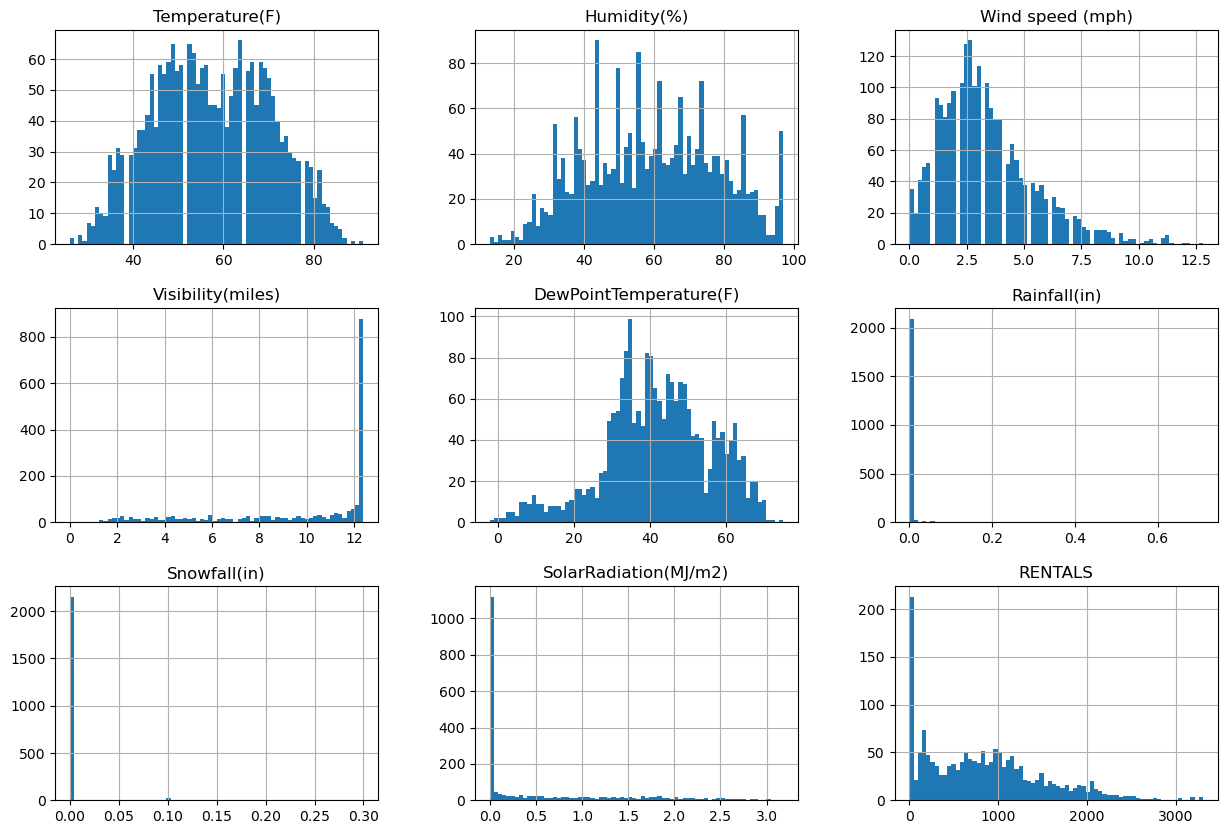

In [9]:
#plotting histogram of all variables to see if a variable is skewed
df_full.hist(figsize = (15,10), bins = 70)

<h3> Visual Analysis (Distribution) </h3> <br>

1. Temperature (F)
The skewness value of temperature is close to 0. A minimum value of 26°F and a maximum of 91°F was observed demonstrating a range of temperatures that could influence bike rental pattern, with colder temperatures potentially leading to fewer rentals.<br><br>

2. Humidity (%)
The skewness value is close to 0. Average humidity is 59.23%, ranging from 13% to 97%. High humidity levels might affect comfort and could impact the decision to rent a bike, especially if it feels uncomfortable due to high humidity. <br><br>

3. Wind Speed (mph)
The skewness value is 1.04 which shows a moderately right-skewed distribution. Average wind speed is 3.34 mph, with a range of 0 to 12.8 mph. Higher wind speeds could make cycling more challenging, potentially leading to fewer rentals on windy days.
It would be interesting to explore if there were any days with exceptionally high wind speeds that could have impacted bike rentals.<br><br>

4. Visibility (miles)
The skewness value is close to 0. The average visibility of 9.65 miles seems normal, but anomalies in visibility, such as foggy or smoggy days, could be investigated further to see how they relate to bike rental patterns.<br><br>

5. Dew Point Temperature (F)
The skewness value is close to 0. The dew point temperature has a minimum value of -2.20, which is unusually low. It shows a wide range that can impact biking rentals, especially at extreme values.<br> <br>

6. Rainfall(in) and Snowfall(in)
A skewness values of 11.91 and 11.45, respectively, indicating highly right-skewed distributions. This was because rainfall and snowfall both have a minimum values of 0, meaning that there were days with no precipitation. However, there are maximum values indicating days with measurable precipitation. <br><br>

7. Solar Radiation (MJ/m2)
It has a skewness value of 1.35, indicating a moderately right-skewed distribution. This indicates the amount of sunlight, with an average of 0.55 MJ/m2. This variable could influence bike rental patterns, with higher radiation increase the likelihood of bike rentals.


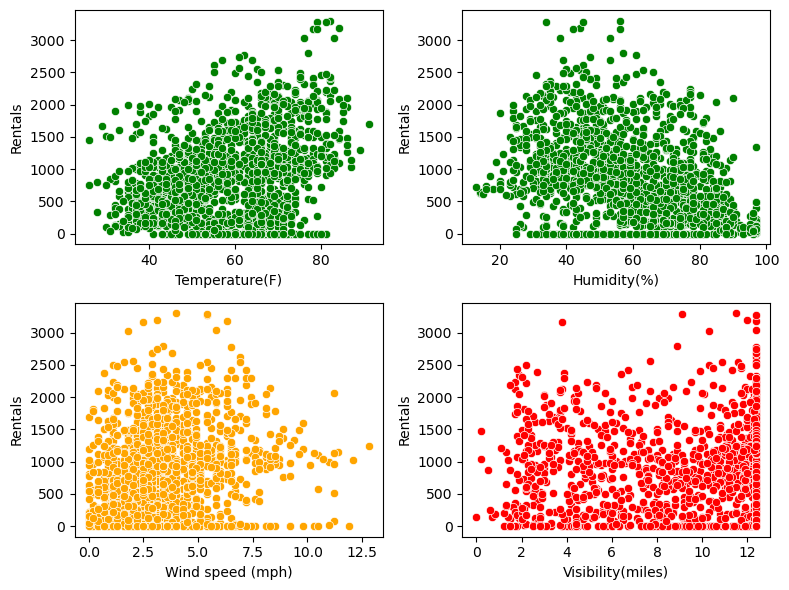

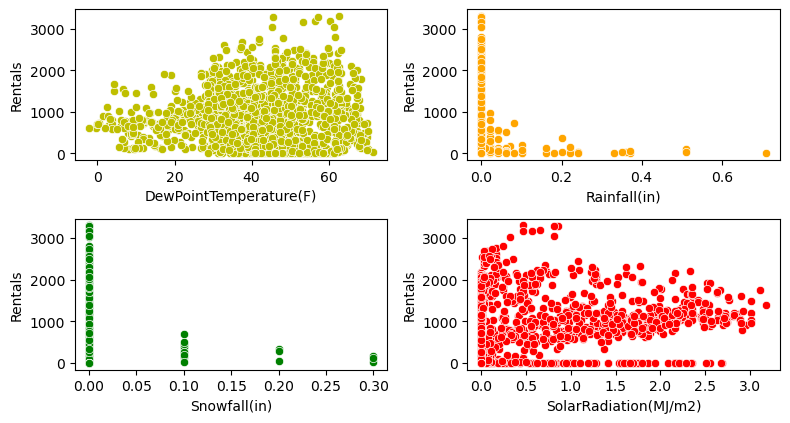

In [10]:
###########################
# Visual EDA (Scatterplots)
###########################

# setting figure size
fig, ax = plt.subplots(figsize = (8, 6))


# developing a scatterplot
plt.subplot(2, 2, 1)
sns.scatterplot(x = df_full['Temperature(F)'],
                y = df_full['RENTALS'],
                color = 'g')


# adding labels but not adding title
plt.xlabel(xlabel = "Temperature(F)")
plt.ylabel(ylabel = 'Rentals')


#############################################


# developing a scatterplot
plt.subplot(2, 2, 2)
sns.scatterplot(x = df_full['Humidity(%)'],
                y = df_full['RENTALS'],
                color = 'g')


# adding labels but not adding title
plt.xlabel(xlabel = "Humidity(%)")
plt.ylabel(ylabel = 'Rentals')


#############################################


# developing a scatterplot
plt.subplot(2, 2, 3)
sns.scatterplot(x = df_full['Wind speed (mph)'],
                y = df_full['RENTALS'],
                color = 'orange')


# adding labels but not adding title
plt.xlabel(xlabel = 'Wind speed (mph)')
plt.ylabel(ylabel = 'Rentals')


###############################################


# developing a scatterplot
plt.subplot(2, 2, 4)
sns.scatterplot(x = df_full['Visibility(miles)'],
                y = df_full['RENTALS'],
                color = 'r')


# adding labels but not adding title
plt.xlabel(xlabel = 'Visibility(miles)')
plt.ylabel(ylabel = 'Rentals')


# cleaning up the layout, saving the figures, and displaying the results
plt.tight_layout()
plt.savefig('./Bike Rentals Scatterplots 1 of 2.png')
plt.show()

##############################################

# setting figure size
fig, ax = plt.subplots(figsize = (8, 6))


# developing a scatterplot
plt.subplot(3, 2, 1)
sns.scatterplot(x = df_full['DewPointTemperature(F)'],
                y = df_full['RENTALS'],
                color = 'y')


# adding labels but not adding title
plt.xlabel(xlabel = "DewPointTemperature(F)")
plt.ylabel(ylabel = 'Rentals')


###############################################


# developing a scatterplot
plt.subplot(3, 2, 2)
sns.scatterplot(x = df_full['Rainfall(in)'],
                y = df_full['RENTALS'],
                color = 'orange')


# adding labels but not adding title
plt.xlabel(xlabel = "Rainfall(in)")
plt.ylabel(ylabel = 'Rentals')


#############################################


# developing a scatterplot
plt.subplot(3, 2, 3)
sns.scatterplot(x = df_full['Snowfall(in)'],
                y = df_full['RENTALS'],
                color = 'g')


# adding labels but not adding title
plt.xlabel(xlabel = 'Snowfall(in)')
plt.ylabel(ylabel = 'Rentals')


#############################################


# developing a scatterplot
plt.subplot(3, 2, 4)
sns.scatterplot(x = df_full['SolarRadiation(MJ/m2)'],
                y = df_full['RENTALS'],
                color = 'r')


# adding labels but not adding title
plt.xlabel(xlabel = 'SolarRadiation(MJ/m2)')
plt.ylabel(ylabel = 'Rentals')


# cleaning up the layout, saving the figures, and displaying the results
plt.tight_layout()
plt.savefig('./Bike Rentals Scatterplots 2 of 2.png')
plt.show()

<h3> Variables vs Rentals Scatterplot Analysis</h3><br>

1. Temperature. This shows that as the temperature increases, the rentals also increase.<br>
2. Humidity. As the humidity increases, the number of rentals starts to decrease.<br>
3. Wind speed. It is evident that high strong winds are affecting rental numbers to decrease. <br>
4. Visibility. Poor or low visibility reduce bike rentals. <br>
5. Dew Point. The higher dew points shows somehow increased in rentals which means more moisture in the air adding user comfort and affecting rental pattern.<br>
6. Rainfall and Snowfall. Both plots show no rainfall or snowfall with higher number of bike rentals.<br>
7. Solar Radiation. This shows that lower radiation has most number of bike rentals.

In [11]:
# counting the number of zeroes for continuous variables
temp_zeroes        = len(df_full['Temperature(F)'][df_full['RENTALS'] == 0])         # Temperature
humidity_zeroes    = len(df_full['Humidity(%)'][df_full['RENTALS'] == 0])            # Humidity
wind_zeroes        = len(df_full['Wind speed (mph)'][df_full['RENTALS'] == 0])       # Wind Speed
visibility_zeroes  = len(df_full['Visibility(miles)'][df_full['RENTALS'] == 0])      # Visibility
dewpt_zeroes       = len(df_full['DewPointTemperature(F)'][df_full['RENTALS'] == 0]) # Dewpoint Temperature
rainfall_zeroes    = len(df_full['Rainfall(in)'][df_full['RENTALS'] == 0])             # Rainfall
snowfall_zeroes    = len(df_full['Snowfall(in)'][df_full['RENTALS'] == 0])             # Snowfall
solar_zeroes       = len(df_full['SolarRadiation(MJ/m2)'][df_full['RENTALS'] == 0])    # SolarRadiation


# printing a table of the results
print(f"""
                           No\t\tYes
                        ---------------------
Temperature               | {temp_zeroes}\t\t{len(df_full) - temp_zeroes}
Humidity                  | {humidity_zeroes}\t\t{len(df_full) - humidity_zeroes}
Wind speed                | {wind_zeroes}\t\t{len(df_full) - wind_zeroes}
Visibility                | {visibility_zeroes}\t\t{len(df_full) - visibility_zeroes}
Dew Point                 | {dewpt_zeroes}\t\t{len(df_full) - dewpt_zeroes}
Rainfall                  | {rainfall_zeroes}\t\t{len(df_full) - rainfall_zeroes}
Snowfall                  | {snowfall_zeroes}\t\t{len(df_full) - snowfall_zeroes}
Solar Radiation           | {solar_zeroes}\t\t{len(df_full) - solar_zeroes}
""")


                           No		Yes
                        ---------------------
Temperature               | 183		2001
Humidity                  | 183		2001
Wind speed                | 183		2001
Visibility                | 183		2001
Dew Point                 | 183		2001
Rainfall                  | 183		2001
Snowfall                  | 183		2001
Solar Radiation           | 183		2001



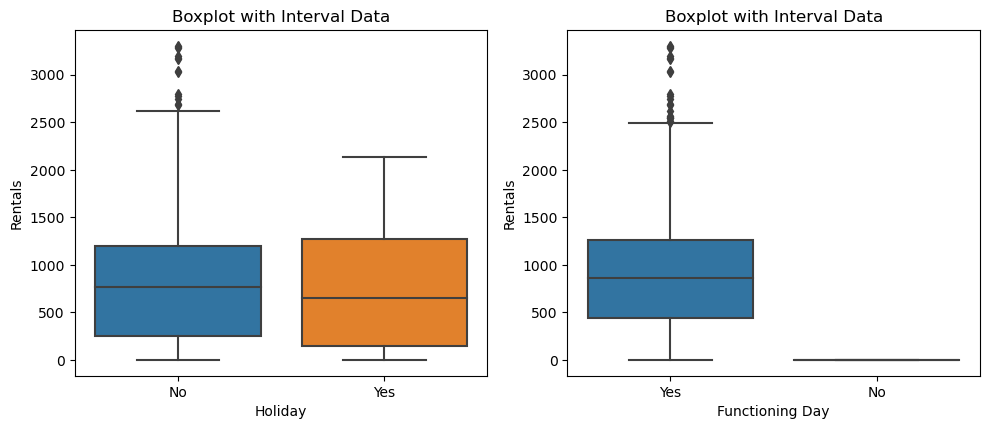

In [12]:
# setting figure size
fig, ax = plt.subplots(figsize = (10, 8))

# developing a boxplot for interval variables(Holiday)
plt.subplot(2, 2, 1)
sns.boxplot(x    = 'Holiday',
            y    = 'RENTALS',
            data = df_full)


# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'Holiday')
plt.ylabel(ylabel = 'Rentals')

# developing a boxplot for interval variables(Functioning Day)
plt.subplot(2, 2, 2)
sns.boxplot(x    = 'FunctioningDay',
            y    = 'RENTALS',
            data = df_full)

# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'Functioning Day')
plt.ylabel(ylabel = 'Rentals')

# cleaning up the layout, saving the figures, and displaying the results
plt.tight_layout()
plt.show()

In [13]:
df_full['FunctioningDay'].describe(include = object)

count     2184
unique       2
top        Yes
freq      1937
Name: FunctioningDay, dtype: object

<h3> Holiday and Functioning Day Boxplot Analysis </h3>

The boxplots indicates that the bike sharing system is indeed more active on non-holidays and functioning days, but there are still rentals occurring on holidays and none on non-functioning days. This observation highlights the importance of the operational status of the bike sharing system in determining bike rental activity.


In [14]:
# printing value counts
print(f"""
{df_full['Holiday'].value_counts()}


{df_full['FunctioningDay'].value_counts()}
""")


Holiday
No     2064
Yes     120
Name: count, dtype: int64


FunctioningDay
Yes    1937
No      247
Name: count, dtype: int64



<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<h3>Part III: Data Preprocessing</h3>

<b><h3>Data Preprocessing, Transformation, and Imputation </b><br></h3>

<b>Dewpoint, Visibility,  and Solar Radiation</b><br>
Median per month was used to impute for the missing values for the three variables to maintain the shape of the distribution. It was also checked that there are at least 100 observations per month to proceed with median. If the missing values are evenly distributed across different months, using the median by month can provide a more accurate imputation compared to using the median of the whole dataset, which may not capture the variation in different months.


In [15]:
## TRANSFORMATION
# Remove milliseconds from the 'DateHour' column
df_full['DateHour'] = df_full['DateHour'].str.split('.').str[0]

# convert the 'DateHour' column to datetime format
df_full['DateHour'] = df_full['DateHour'].astype('datetime64[ns]')

# Round hour if minute is 59
df_full.loc[df_full['DateHour'].dt.minute == 59, 'DateHour'] += pd.Timedelta(minutes=1)
df_full['DateHour'] = df_full['DateHour'].dt.floor('H')

# Extract Day, Month, and Hour
df_full['Day'] = df_full['DateHour'].dt.day_name()
df_full['Month'] = df_full['DateHour'].dt.month
df_full['Hour'] = df_full['DateHour'].dt.hour

# Convert Month and Hour to integers
df_full['Month'] = df_full['Month'].astype(int)
df_full['Hour'] = df_full['Hour'].astype(int)

In [16]:
# Filter the DataFrame for the four months
four_months_data = df_full[df_full['Month'].isin([9, 10, 11, 12])]

# Calculate the count of observations per month for the four months
month_counts = four_months_data.groupby('Month').size()

month_counts

Month
9     720
10    744
11    192
12    528
dtype: int64

In [17]:
# Calculate median dew point temperature per month
median_dewpoint_per_month = df_full.groupby('Month')['DewPointTemperature(F)'].median()

# Fill missing values in each month with the corresponding median dew point temperature
df_full.loc[df_full['Month'] == 9, 'DewPointTemperature(F)'] = df_full.loc[df_full['Month'] == 9, 'DewPointTemperature(F)'].fillna(median_dewpoint_per_month[9])
df_full.loc[df_full['Month'] == 10, 'DewPointTemperature(F)'] = df_full.loc[df_full['Month'] == 10, 'DewPointTemperature(F)'].fillna(median_dewpoint_per_month[10])
df_full.loc[df_full['Month'] == 11, 'DewPointTemperature(F)'] = df_full.loc[df_full['Month'] == 11, 'DewPointTemperature(F)'].fillna(median_dewpoint_per_month[11])
df_full.loc[df_full['Month'] == 12, 'DewPointTemperature(F)'] = df_full.loc[df_full['Month'] == 12, 'DewPointTemperature(F)'].fillna(median_dewpoint_per_month[12])

# Calculate median visibility per month
median_visibility_per_month = df_full.groupby('Month')['Visibility(miles)'].median()

# Calculate median solar radiation per month
median_solar_radiation_per_month = df_full.groupby('Month')['SolarRadiation(MJ/m2)'].median()

# Fill missing values in each month with the corresponding median visibility
df_full.loc[df_full['Month'] == 9, 'Visibility(miles)'] = df_full.loc[df_full['Month'] == 9, 'Visibility(miles)'].fillna(median_visibility_per_month[9])
df_full.loc[df_full['Month'] == 10, 'Visibility(miles)'] = df_full.loc[df_full['Month'] == 10, 'Visibility(miles)'].fillna(median_visibility_per_month[10])
df_full.loc[df_full['Month'] == 11, 'Visibility(miles)'] = df_full.loc[df_full['Month'] == 11, 'Visibility(miles)'].fillna(median_visibility_per_month[11])
df_full.loc[df_full['Month'] == 12, 'Visibility(miles)'] = df_full.loc[df_full['Month'] == 12, 'Visibility(miles)'].fillna(median_visibility_per_month[12])

# Fill missing values in each month with the corresponding median solar radiation
df_full.loc[df_full['Month'] == 9, 'SolarRadiation(MJ/m2)'] = df_full.loc[df_full['Month'] == 9, 'SolarRadiation(MJ/m2)'].fillna(median_solar_radiation_per_month[9])
df_full.loc[df_full['Month'] == 10, 'SolarRadiation(MJ/m2)'] = df_full.loc[df_full['Month'] == 10, 'SolarRadiation(MJ/m2)'].fillna(median_solar_radiation_per_month[10])
df_full.loc[df_full['Month'] == 11, 'SolarRadiation(MJ/m2)'] = df_full.loc[df_full['Month'] == 11, 'SolarRadiation(MJ/m2)'].fillna(median_solar_radiation_per_month[11])
df_full.loc[df_full['Month'] == 12, 'SolarRadiation(MJ/m2)'] = df_full.loc[df_full['Month'] == 12, 'SolarRadiation(MJ/m2)'].fillna(median_solar_radiation_per_month[12])


In [18]:
# Checking missing values excluding 'RENTALS'
df_full.iloc[:, :-3].isnull().sum(axis=0)

DateHour                    0
Temperature(F)              0
Humidity(%)                 0
Wind speed (mph)            0
Visibility(miles)           0
DewPointTemperature(F)      0
Rainfall(in)                0
Snowfall(in)                0
SolarRadiation(MJ/m2)       0
Holiday                     0
FunctioningDay              0
RENTALS                   546
set                         0
dtype: int64

In [19]:
# importing the original dataset for comparison (has missing values)
df_full_mv = pd.concat(objs = [df_train, df_test],
                    axis = 0,
                    ignore_index = False)

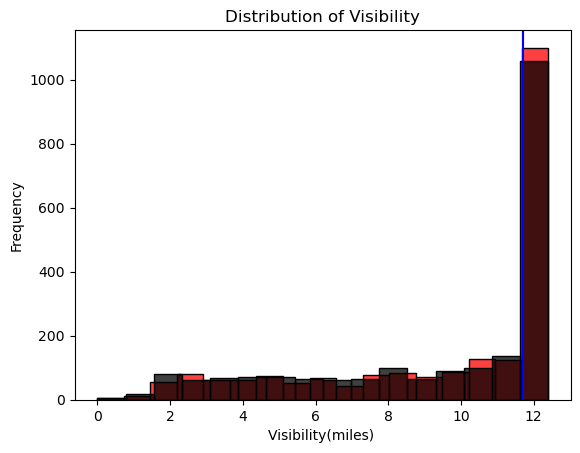

In [20]:
####################
## Visibility_miles ##
####################
# scatterplot AFTER missing values
sns.histplot(data  = df_full,
             x     = 'Visibility(miles)',
             fill  = True,
             color = "red")


# scatterplot BEFORE missing values
sns.histplot(data  = df_full_mv,
             x     = 'Visibility(miles)',
             fill  = True,
             color = 'black')


# mean lines
plt.axvline(df_full['Visibility(miles)'].median()   , color = "red")
plt.axvline(df_full_mv['Visibility(miles)'].median(), color = "blue")


# labels and rendering
plt.title (label  = "Distribution of Visibility")
plt.xlabel(xlabel = "Visibility(miles) ")
plt.ylabel(ylabel = "Frequency")
plt.show()

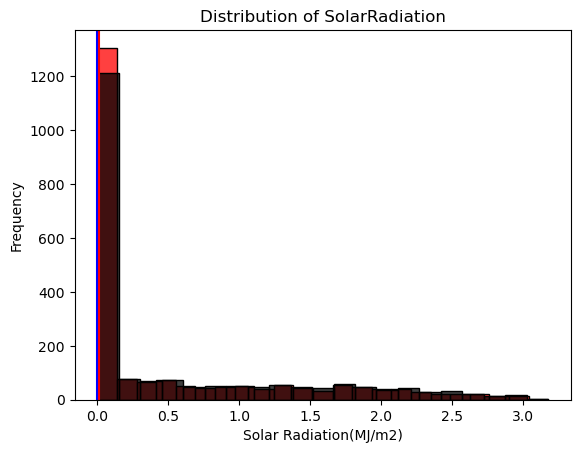

In [21]:
####################
## SolarRadiation_MJ_per_m2 ##
####################
# scatterplot AFTER missing values
sns.histplot(data  = df_full,
             x     = 'SolarRadiation(MJ/m2)',
             fill  = True,
             color = "red")


# scatterplot BEFORE missing values
sns.histplot(data  = df_full_mv,
             x     = 'SolarRadiation(MJ/m2)',
             fill  = True,
             color = 'black')


# mean lines
plt.axvline(df_full['SolarRadiation(MJ/m2)'].median()   , color = "red")
plt.axvline(df_full_mv['SolarRadiation(MJ/m2)'].median(), color = "blue")


# labels and rendering
plt.title (label  = "Distribution of SolarRadiation")
plt.xlabel(xlabel = "Solar Radiation(MJ/m2)")
plt.ylabel(ylabel = "Frequency")
plt.show()

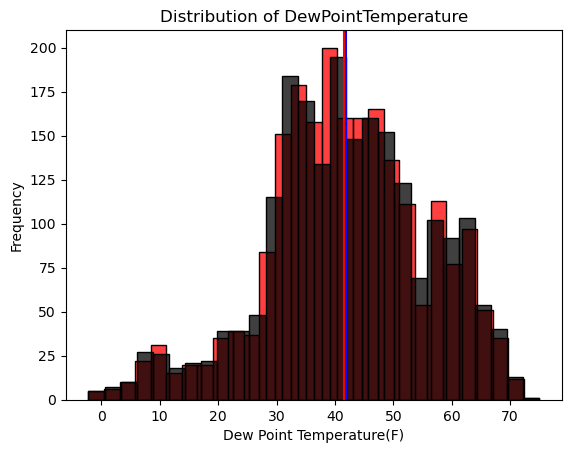

In [22]:
####################
## DewPointTemperature(F) ##
####################
# scatterplot AFTER missing values
sns.histplot(data  = df_full,
             x     = 'DewPointTemperature(F)',
             fill  = True,
             color = "red")


# scatterplot BEFORE missing values
sns.histplot(data  = df_full_mv,
             x     = 'DewPointTemperature(F)',
             fill  = True,
             color = 'black')


# mean lines
plt.axvline(df_full['DewPointTemperature(F)'].median()   , color = "red")
plt.axvline(df_full_mv['DewPointTemperature(F)'].median(), color = "blue")


# labels and rendering
plt.title (label  = "Distribution of DewPointTemperature")
plt.xlabel(xlabel = "Dew Point Temperature(F)")
plt.ylabel(ylabel = "Frequency")
plt.show()

In [23]:
# printing columns
print(f"""
Day
------
{df_full['Day'].value_counts()}


Hour
----------
{df_full['Hour'].value_counts()}


Month
-------------
{df_full['Month'].value_counts()}
""")


Day
------
Day
Friday       336
Saturday     312
Tuesday      312
Monday       312
Sunday       312
Thursday     311
Wednesday    289
Name: count, dtype: int64


Hour
----------
Hour
6     91
9     91
17    91
0     91
23    91
1     91
15    91
20    91
10    91
16    91
21    91
3     91
8     91
7     91
11    91
2     91
19    91
18    91
5     91
12    91
13    91
14    91
22    91
4     91
Name: count, dtype: int64


Month
-------------
Month
10    744
9     720
12    528
11    192
Name: count, dtype: int64



<h3> Transformation</h3>

In [24]:
# Transforming Holiday and FunctioningDay into binary columns
# Replace 'Yes' and 'No' with 1 and 0 for 'Holiday' and 'FunctioningDay' columns
df_full['Holiday'] = df_full['Holiday'].replace({'Yes': 1, 'No': 0})
df_full['FunctioningDay'] = df_full['FunctioningDay'].replace({'Yes': 1, 'No': 0})

<h3> Boxplot of Rentals by Day </h3>

Wednesday sees the highest bike rental numbers among weekdays, while Thursday has the lowest rental count. Saturday stands out as the most popular day for rentals during the weekend. This trend suggests that many people prefer renting and riding bikes on their day off. Additionally, there is a noticeable decline in rentals from Wednesday to Thursday during the week, followed by an increase leading into Saturday.

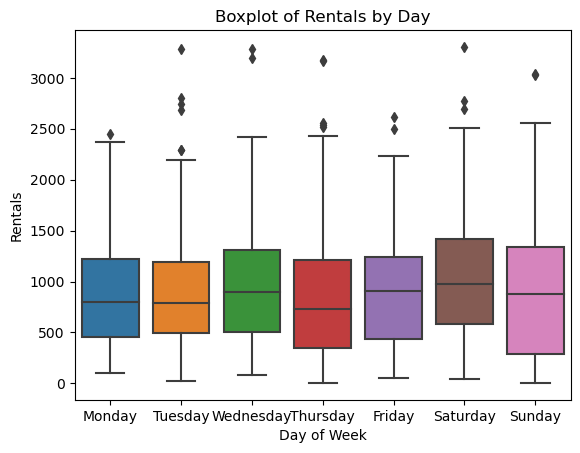

In [25]:
# Define the order of days
order_day = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

operational_hours = df_full[df_full['FunctioningDay'] == 1]

# Create a boxplot with days sorted in the specified order
sns.boxplot(x     = 'Day', 
            y     = 'RENTALS', 
            data  = operational_hours, 
            order = order_day)

# Titles and axis labels
plt.title('Boxplot of Rentals by Day')
plt.xlabel('Day of Week')
plt.ylabel('Rentals')

# Display the plot
plt.show()


<h3> Average Rentals by Hour Plot Analysis</h3>

<b>Operational Hours and Rental Peaks</b><br>
The bike sharing system is most active at 8:00 AM and 6:00 PM, coinciding with typical work commute times. Rentals generally increase from the morning, peak at 6:00 PM, and then decrease.

<b>Operational Hours, Non-Holidays, and Work Commutes</b><br>
Higher rentals during non-holiday periods suggest that many rentals are for commuting to and from work. Therefore, more rentals are expected during non-holiday periods.

<b>Operational Hours, Weekdays (Wednesday), and Work Commutes</b><br>
Wednesdays, in particular, see the highest number of rentals among weekdays, with peak hours at 8:00 AM and 6:00 PM, aligning with work commute times.

<b>Operational Hours, Weekends (Saturday), and Weekend Activities</b><br>
Saturdays also have high rental numbers compared to Sundays, with peak hours at 8:00 AM and 6:00 PM, similar to weekdays. The number of rentals on weekends is slightly higher than on Wednesdays and other weekdays.


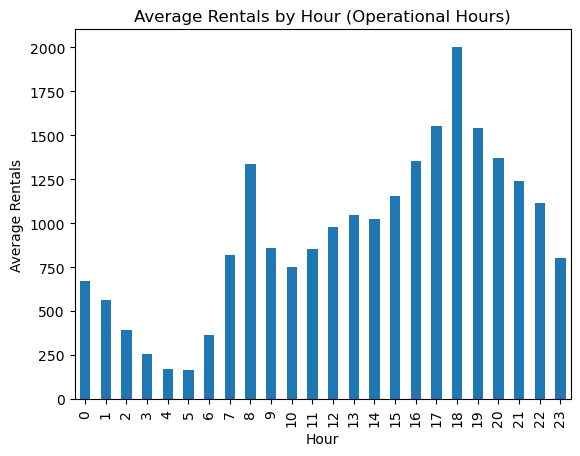

In [26]:
# Filter out operational hours from df_full
operational_hours = df_full[df_full['FunctioningDay'] == 1]

# Creating bar plot
hourly_rentals = operational_hours.groupby('Hour')['RENTALS'].mean()
hourly_rentals.plot(kind='bar')

# Plot labels
plt.xlabel('Hour')
plt.ylabel('Average Rentals')

# Displaying the plot
plt.title('Average Rentals by Hour (Operational Hours)')
plt.show()


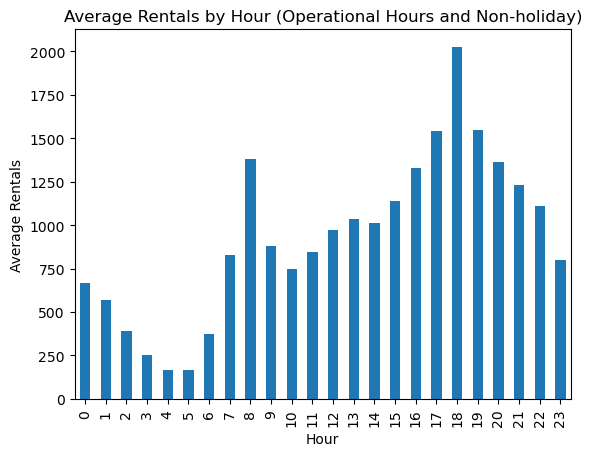

In [27]:
# Filter out operational hours from df_full for non-holidays
fd_hol = df_full[(df_full['FunctioningDay'] == 1) & (df_full['Holiday'] == 0)]

# Calculate average rentals by hour
hourly_rentals_hol = fd_hol.groupby('Hour')['RENTALS'].mean()

# Creating bar plot
hourly_rentals_hol.plot(kind='bar')

# Plot labels
plt.xlabel('Hour')
plt.ylabel('Average Rentals')

# Displaying the plot
plt.title('Average Rentals by Hour (Operational Hours and Non-holiday)')
plt.show()


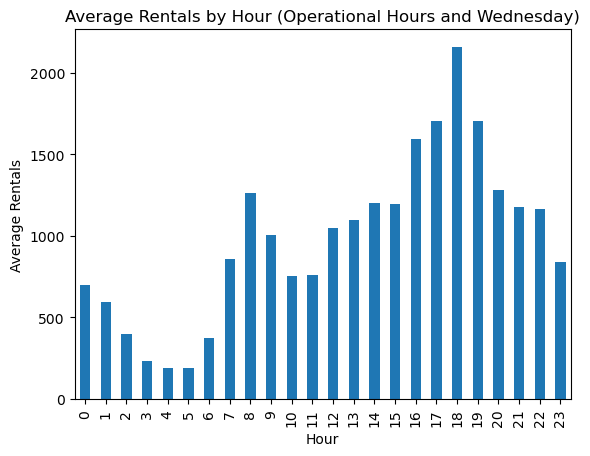

In [28]:
# Filtering out operational hours from df_full for Wednesday
fd_f = df_full[(df_full['FunctioningDay'] == 1) & (df_full['Day'] == 'Wednesday')]

# Calculating average rentals by hour
hourly_rentals_f = fd_f.groupby('Hour')['RENTALS'].mean()

# Creating a bar plot
hourly_rentals_f.plot(kind='bar')

# Plot labels
plt.xlabel('Hour')
plt.ylabel('Average Rentals')

# Displaying the plot
plt.title('Average Rentals by Hour (Operational Hours and Wednesday)')
plt.show()


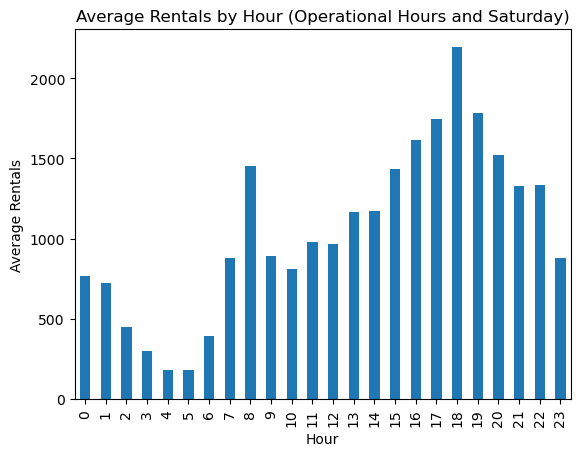

In [29]:
# Filtering out operational hours from df_full for Saturday
fd_s = df_full[(df_full['FunctioningDay'] == 1) & (df_full['Day'] == 'Saturday')]

# Calculating average rentals by hour
hourly_rentals_s = fd_s.groupby('Hour')['RENTALS'].mean()

# Creating a bar plot
hourly_rentals_s.plot(kind='bar')

# Plot labels
plt.xlabel('Hour')
plt.ylabel('Average Rentals')

# Displaying the plot
plt.title('Average Rentals by Hour (Operational Hours and Saturday)')
plt.show()


In [30]:
operational_hours['Day'].value_counts()

Day
Friday       336
Thursday     311
Saturday     288
Sunday       281
Monday       264
Tuesday      240
Wednesday    217
Name: count, dtype: int64

<h3> Boxplot of Rentals by Month</h3>

This shows that October has the highest number of bike rental counts among the other three months.

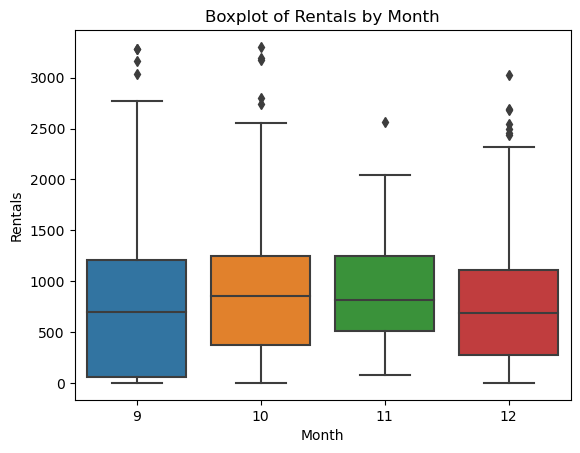

In [31]:
# Creating a boxplot of rentals by month
sns.boxplot(x     = 'Month', 
            y     = 'RENTALS', 
            data  = df_full)

# Titles and axis labels
plt.title('Boxplot of Rentals by Month')
plt.xlabel('Month')
plt.ylabel('Rentals')

# Display the plot
plt.show()


In [32]:
operational_hours['Month'].value_counts()

Month
10    696
9     569
12    480
11    192
Name: count, dtype: int64

In [33]:
# Create a mapping for weekdays and weekends
day_order = {'Sunday': 1, 'Monday': 2, 'Tuesday': 3, 'Wednesday': 4, 'Thursday': 5, 'Friday': 6, 'Saturday': 7}

# Map the 'Day' column to the new integer values
df_full['Day'] = df_full['Day'].map(day_order)

In [34]:
# Pivot the 'Day' column
df_day_pivot = df_full.pivot_table(index='DateHour', columns='Day', aggfunc='size', fill_value=0)

# Rename the columns to match the day names
df_day_pivot.columns = list(day_order.keys())

# Merge the pivoted 'Day' columns back to the original DataFrame
df_full = df_full.merge(df_day_pivot, left_on='DateHour', right_index=True, how='left')

# Pivot the 'Hour' column
df_hour_pivot = df_full.pivot_table(index='DateHour', columns='Hour', aggfunc='size', fill_value=0)

# Rename the columns to match the hour values
hour_order = list(range(24))
df_hour_pivot.columns = [f'Hour_{hour}' for hour in hour_order]

# Merge the pivoted 'Hour' columns back to the original DataFrame
df_full = df_full.merge(df_hour_pivot, left_on='DateHour', right_index=True, how='left')

# Pivot the 'Month' column
df_month_pivot = df_full.pivot_table(index='DateHour', columns='Month', aggfunc='size', fill_value=0)

# Rename the columns to match the month values
month_order = [9, 10, 11, 12]
df_month_pivot.columns = [f'Month_{month}' for month in month_order]

# Merge the pivoted 'Month' columns back to the original DataFrame
df_full = df_full.merge(df_month_pivot, left_on='DateHour', right_index=True, how='left')


<h3> Base Modeling </h3>

<b> Functioning Day </b><br>
It has the highest positive coefficient value, indicating that being a functioning day is strongly associated with an increase in rentals. This suggests that the operational status of the rental service on a given day has a significant impact on the number of rentals. This variable can serve as a baseline for new feature engineering, potentially by creating interaction terms with other variables or exploring different ways to represent the operational status of the service.<br>

<b> Temperature </b><br>
It has a positive coefficient, indicating that an increase in temperature is associated with an increase in rentals. This is a common finding in bike rental datasets, as warmer weather is typically more conducive to outdoor activities like biking.

<b> Holiday </b><br>
It has a negative coefficient value which suggests that, on average, there is a decrease in bike rentals during holiday periods compared to non-holiday periods. This finding aligns with the expectation that during holidays, which are typically non-working days, there may be fewer people using bikes for commuting or other purposes, leading to a decrease in rentals.

<b> Wind speed</b><br>
It has a positive coefficient suggesting that a moderate increase in wind speed is associated with an increase in bike rentals, not as strong as functional day.<br>

<b> Humidity </b><br>
It has a negative coefficient value which indicates a negative relationship between humidity levels and bike rentals. As humidity rises, bike rentals generally decline, possibly due to discomfort at higher humidity levels. However, this relationship is not as pronounced as with rainfall.<br>

Other variables like visibility and dew point temperature have small effect in bike rental as well.

In [35]:
## Base Modeling ##

# Step 1: INSTANTIATE a model object
lm_base = smf.ols(formula="""RENTALS ~ Q('Temperature(F)') +
                                       Q('Humidity(%)') +
                                       Q('Visibility(miles)') +
                                       Q('DewPointTemperature(F)') +
                                       Q('Rainfall(in)') +
                                       Q('Snowfall(in)') +
                                       Q('SolarRadiation(MJ/m2)') +
                                       Q('Wind speed (mph)') +
                                       Holiday +
                                       FunctioningDay""",
                                       data = df_full)

# Step 2: FIT the data into the model object
results = lm_base.fit()

# Step 3: analyze the SUMMARY output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                RENTALS   R-squared:                       0.488
Model:                            OLS   Adj. R-squared:                  0.485
Method:                 Least Squares   F-statistic:                     155.2
Date:                Wed, 28 Feb 2024   Prob (F-statistic):          2.27e-228
Time:                        22:29:33   Log-Likelihood:                -12403.
No. Observations:                1638   AIC:                         2.483e+04
Df Residuals:                    1627   BIC:                         2.489e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<h3>Part IV: Feature Engineering </h3><br>

<b>Temperature and Functioning Day Interaction</b><br>
Considering that both variables, temperature and functioning day, have positive coefficient values, their interaction could be significant in the model. This interaction term could capture more patterns in the data that would not be apparent when looking at each variable separately. 

On days with more favorable temperatures, bikers may be more inclined to use the bike sharing system, especially if it's a functioning day or active. This interaction term can reflect how temperature influences the utilization of the bike sharing system. For example, higher temperatures on functioning days may lead to increased system usage, affecting bike rental demand.

In [36]:
## Feature 1 Temperature and Functioning Day Interaction

# Temperature x FunctionIng Day Interaction
df_full['Temp_FunctioningDay'] = df_full['Temperature(F)'] * df_full['FunctioningDay']

<b>Humidity and Dew Point Temperature Interaction</b><br>
Humidity and dew point temperature are key weather variables that can influence bike rental patterns. They are closely related measures that together provide details about the atmospheric moisture content and comfort levels. 

High humidity levels, especially when combined with high dew point temperatures, can create conditions that are less favorable for outdoor activities like biking. Adding this in the model will show how weather factors collectively impact bike rentals. It can also improve the model's ability to predict rentals by considering the joint effects of humidity and dew point temperature, beyond what each variable contributes individually.

In [37]:
## Feature 2 Humidity and Dew Point Temperature Interaction

# Humidity x Functioning Day Interaction
df_full['HumidityFDay'] = df_full['Humidity(%)'] * df_full['DewPointTemperature(F)']

<b>Precipitation</b><br>
The value counts indicate that the majority of the days have no or minimal rainfall or snowfall. This information is valuable for the model because it highlights that most days do not experience significant precipitation, which could help the model learn the normal rental patterns on dry days and differentiate them from days with precipitation.

Days with precipitation are expected to have lower bike rental demand compared to dry days. This is due to factors such as discomfort, safety concerns, and reduced convenience associated with biking in wet or snowy conditions.

In [38]:
## Feature 3 Precipitation

df_full['Precipitation'] = (df_full['Rainfall(in)'] + df_full['Snowfall(in)'] > 0).astype(int)

<b> Heat Index </b><br>

Heat index is calculated from both temperature and humidity variables. It is a measure of how hot it feels when relative humidity is added to the actual air temperature. High heat index values indicate conditions where it feels hotter than the actual temperature due to high humidity levels, which can impact people's willingness to engage in biking. By incorporating the heat index, the model can better capture the effects of weather on bike rental patterns, particularly during hot and humid periods when rentals may decrease.



In [39]:
## Feature 4 Heat Index
## Based on 1990 National Weather Service (NWS) Formula

# Defining a function to calculate the Heat Index
def calculate_heat_index(row):
    temperature = row['Temperature(F)']
    humidity = row['Humidity(%)']
    
    c1 = -42.379
    c2 = 2.04901523
    c3 = 10.14333127
    c4 = -0.22475541
    c5 = -6.83783e-3
    c6 = -5.481717e-2
    c7 = 1.22874e-3
    c8 = 8.5282e-4
    c9 = -1.99e-6

    heat_index = (
        c1 +
        c2 * temperature +
        c3 * humidity +
        c4 * temperature * humidity +
        c5 * temperature**2 +
        c6 * humidity**2 +
        c7 * temperature**2 * humidity +
        c8 * temperature * humidity**2 +
        c9 * temperature**2 * humidity**2
    )

    return round(heat_index, 2)

# Applying the function to create a new column 'Heat_Index'
df_full['Heat_Index'] = df_full.apply(calculate_heat_index, axis=1)


<h3> Analysis of Correlations </h3>

<b> Hourly Rentals </b><br>
The hour with the highest positive correlation to rentals is 6:00 pm (Hour_18), followed by the peak hour at 8:00 am (Hour_8).<br>

<b> Day of the Week </b><br>
Friday and Saturday show the highest positive correlation with rentals, while Wednesday exhibits the lowest negative correlation among the weekdays.<br>

<b> Temperature and Functioning Days </b><br>
The interaction between temperature and functioning days exhibits the highest positive correlation among the new features.<br>

<b> Humidity and Dew Point Temperature</b><br>
In this case, the negative coefficient for the interaction term suggests that the combined effect of humidity and dew point temperature on bike rentals is negative, even though dew point temperature on its own has a positive effect.

This means that the impact of humidity on bike rentals changes based on the level of dew point temperature, and the interaction between these two factors results in a negative overall effect on bike rentals.

<b> Precipitation </b><br>
Precipitation, represented by the interaction of rainfall and snowfall, shows a notable negative correlation of -0.22 with rentals which is expected to affect bike rentals to decrease.<br>

<b> Heat Index </b><br>
The heat index shows a negative correlation which means that there is a weak inverse relationship between the heat index and bike rentals. In other words, as the heat index increases, bike rentals tend to decrease slightly, but this relationship is not very strong.<br>

In [40]:
# correlations - Transformations and New Features 
df_full_corr = df_full.loc[ : , ['Hour_0',
                                 'Hour_1',
                                 'Hour_2',
                                 'Hour_3',
                                 'Hour_4',
                                 'Hour_5',
                                 'Hour_6',
                                 'Hour_7',
                                 'Hour_8',
                                 'Hour_9',
                                 'Hour_10',
                                 'Hour_11',
                                 'Hour_12',
                                 'Hour_13',
                                 'Hour_14',
                                 'Hour_15',
                                 'Hour_16',
                                 'Hour_17',
                                 'Hour_18',
                                 'Hour_19',
                                 'Hour_20',
                                 'Hour_21',
                                 'Hour_22',
                                 'Hour_23',
                                 'Month_9',
                                 'Month_10',
                                 'Month_11',
                                 'Month_12',
                                 'Sunday',
                                 'Monday',
                                 'Tuesday',
                                 'Wednesday',
                                 'Thursday',
                                 'Friday',
                                 'Saturday',
                                 'Temp_FunctioningDay',
                                 'HumidityFDay',
                                 'Precipitation',
                                 'Heat_Index',
                                 'RENTALS']  ].corr(method = 'pearson')\
                                                  .round(decimals = 2)


# checking results
df_full_corr.loc[ [              'Hour_0',
                                 'Hour_1',
                                 'Hour_2',
                                 'Hour_3',
                                 'Hour_4',
                                 'Hour_5',
                                 'Hour_6',
                                 'Hour_7',
                                 'Hour_8',
                                 'Hour_9',
                                 'Hour_10',
                                 'Hour_11',
                                 'Hour_12',
                                 'Hour_13',
                                 'Hour_14',
                                 'Hour_15',
                                 'Hour_16',
                                 'Hour_17',
                                 'Hour_18',
                                 'Hour_19',
                                 'Hour_20',
                                 'Hour_21',
                                 'Hour_22',
                                 'Hour_23',
                                 'Month_9',
                                 'Month_10',
                                 'Month_11',
                                 'Month_12',
                                 'Sunday',
                                 'Monday',
                                 'Tuesday',
                                 'Wednesday',
                                 'Thursday',
                                 'Friday',
                                 'Saturday',
                                 'Temp_FunctioningDay',
                                 'HumidityFDay',
                                 'Precipitation',
                                 'Heat_Index'],
                                 ['RENTALS'] ]

,RENTALS
Hour_0,-0.07
Hour_1,-0.10
Hour_2,-0.15
Hour_3,-0.19
Hour_4,-0.23
Hour_5,-0.22
Hour_6,-0.16
Hour_7,-0.03
Hour_8,0.11
Hour_9,-0.02


In [41]:
# making a copy of df_full
df_full_explanatory = df_full.copy()

# formatting each explanatory variable for statsmodels
for val in df_full_explanatory:
    print(f"{val} +")

DateHour +
Temperature(F) +
Humidity(%) +
Wind speed (mph) +
Visibility(miles) +
DewPointTemperature(F) +
Rainfall(in) +
Snowfall(in) +
SolarRadiation(MJ/m2) +
Holiday +
FunctioningDay +
RENTALS +
set +
Day +
Month +
Hour +
Sunday +
Monday +
Tuesday +
Wednesday +
Thursday +
Friday +
Saturday +
Hour_0 +
Hour_1 +
Hour_2 +
Hour_3 +
Hour_4 +
Hour_5 +
Hour_6 +
Hour_7 +
Hour_8 +
Hour_9 +
Hour_10 +
Hour_11 +
Hour_12 +
Hour_13 +
Hour_14 +
Hour_15 +
Hour_16 +
Hour_17 +
Hour_18 +
Hour_19 +
Hour_20 +
Hour_21 +
Hour_22 +
Hour_23 +
Month_9 +
Month_10 +
Month_11 +
Month_12 +
Temp_FunctioningDay +
HumidityFDay +
Precipitation +
Heat_Index +


<h3> Modeling with New Features </h3><br>

All variables have p values of less than 0.05.

In [42]:
## Modeling with New Features ##

# Step 1: INSTANTIATE a model object
lm_best = smf.ols(formula =  """RENTALS  ~  
                                            Hour_1 +
                                            Hour_2 +
                                            Hour_3 +
                                            Hour_4 +
                                            Hour_5 +
                                            Hour_6 +
                                            Hour_7 +
                                            Hour_8 +
                                            Hour_9 +
                                            Hour_15 +
                                            Hour_16 +
                                            Hour_17 +
                                            Hour_18 +
                                            Hour_19 +
                                            Hour_20 +
                                            Hour_21 +
                                            Hour_22 +
                                            Saturday +
                                            Sunday +
                                            Wednesday +
                                            Q('DewPointTemperature(F)') +
                                            HumidityFDay +
                                            Temp_FunctioningDay +
                                            Precipitation +
                                            Q('Wind speed (mph)') +
                                            Holiday + 
                                            Heat_Index""",
                                            data = df_full)

# Step 2: FIT the data into the model object
results = lm_best.fit()

# Step 3: analyze the SUMMARY output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                RENTALS   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     194.9
Date:                Wed, 28 Feb 2024   Prob (F-statistic):               0.00
Time:                        22:29:34   Log-Likelihood:                -11763.
No. Observations:                1638   AIC:                         2.358e+04
Df Residuals:                    1610   BIC:                         2.373e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

<br><hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<h2>Part III: Data Partitioning</h2><br>
This is a very important step for your submission on Kaggle. Make sure to complete your data preparationbefore moving forward.


<h3> Standardization</h3>

In [43]:
df = df_full.drop(['DateHour','set'],
                           axis = 1)

In [44]:
x_data = df

# # INSTANTIATING a StandardScaler() object
scaler = StandardScaler()


# # FITTING and TRANSFORMING
x_scaled = scaler.fit_transform(x_data)


# # converting scaled data into a DataFrame
x_scaled_df = pd.DataFrame(x_scaled)


# # labeling columns
x_scaled_df.columns = x_data.columns


x_data = x_scaled_df.copy()

# # checking the results
x_data.describe(include = 'number').round(decimals = 2)

,Temperature(F),Humidity(%),Wind speed (mph),Visibility(miles),DewPointTemperature(F),Rainfall(in),Snowfall(in),SolarRadiation(MJ/m2),Holiday,FunctioningDay,RENTALS,Day,Month,Hour,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Hour_0,Hour_1,Hour_2,Hour_3,Hour_4,Hour_5,Hour_6,Hour_7,Hour_8,Hour_9,Hour_10,Hour_11,Hour_12,Hour_13,Hour_14,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23,Month_9,Month_10,Month_11,Month_12,Temp_FunctioningDay,HumidityFDay,Precipitation,Heat_Index
count,2184.00,2184.00,2184.00,2184.00,2184.00,2184.00,2184.00,2184.00,2184.00,2184.00,1638.00,2184.00,2184.00,2184.00,2184.00,2184.00,2184.00,2184.00,2184.00,2184.00,2184.00,2184.00,2184.00,2184.00,2184.00,2184.00,2184.00,2184.00,2184.00,2184.00,2184.00,2184.00,2184.00,2184.00,2184.00,2184.00,2184.00,2184.00,2184.00,2184.00,2184.00,2184.00,2184.00,2184.00,2184.00,2184.00,2184.00,2184.00,2184.00,2184.00,2184.00,2184.00,2184.00
mean,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.44,-2.47,-1.62,-2.82,-3.20,-0.13,-0.11,-0.65,-0.24,-2.80,-1.26,-1.50,-1.08,-1.66,-0.41,-0.41,-0.41,-0.39,-0.41,-0.43,-0.41,-0.21,-0.21,-0.21,-0.21,-0.21,-0.21,-0.21,-0.21,-0.21,-0.21,-0.21,-0.21,-0.21,-0.21,-0.21,-0.21,-0.21,-0.21,-0.21,-0.21,-0.21,-0.21,-0.21,-0.21,-0.70,-0.72,-0.31,-0.56,-2.31,-1.93,-0.25,-1.61
25%,-0.73,-0.82,-0.75,-0.61,-0.61,-0.13,-0.11,-0.65,-0.24,0.36,-0.89,-1.01,-1.08,-0.83,-0.41,-0.41,-0.41,-0.39,-0.41,-0.43,-0.41,-0.21,-0.21,-0.21,-0.21,-0.21,-0.21,-0.21,-0.21,-0.21,-0.21,-0.21,-0.21,-0.21,-0.21,-0.21,-0.21,-0.21,-0.21,-0.21,-0.21,-0.21,-0.21,-0.21,-0.21,-0.70,-0.72,-0.31,-0.56,-0.34,-0.72,-0.25,-0.67
50%,-0.03,-0.01,-0.21,0.58,-0.03,-0.13,-0.11,-0.64,-0.24,0.36,-0.10,-0.01,-0.21,0.00,-0.41,-0.41,-0.41,-0.39,-0.41,-0.43,-0.41,-0.21,-0.21,-0.21,-0.21,-0.21,-0.21,-0.21,-0.21,-0.21,-0.21,-0.21,-0.21,-0.21,-0.21,-0.21,-0.21,-0.21,-0.21,-0.21,-0.21,-0.21,-0.21,-0.21,-0.21,-0.70,-0.72,-0.31,-0.56,0.12,-0.10,-0.25,-0.37
75%,0.83,0.79,0.56,0.78,0.66,-0.13,-0.11,0.47,-0.24,0.36,0.57,0.98,0.66,0.83,-0.41,-0.41,-0.41,-0.39,-0.41,-0.43,-0.41,-0.21,-0.21,-0.21,-0.21,-0.21,-0.21,-0.21,-0.21,-0.21,-0.21,-0.21,-0.21,-0.21,-0.21,-0.21,-0.21,-0.21,-0.21,-0.21,-0.21,-0.21,-0.21,-0.21,-0.21,1.43,1.39,-0.31,-0.56,0.71,0.58,-0.25,0.47
max,2.61,2.02,4.57,0.78,2.39,18.88,16.07,3.33,4.15,0.36,3.76,1.48,1.53,1.66,2.45,2.45,2.45,2.56,2.45,2.35,2.45,4.80,4.80,4.80,4.80,4.80,4.80,4.80,4.80,4.80,4.80,4.80,4.80,4.80,4.80,4.80,4.80,4.80,4.80,4.80,4.80,4.80,4.80,4.80,4.80,1.43,1.39,3.22,1.77,1.86,3.09,4.08,4.30


<br><h3>Separating the Kaggle Data</h3><br>

In [45]:
## parsing out testing data (needed for later) ##

# dataset for kaggle
kaggle_data = df_full[ df_full['set'] == 'Kaggle' ].copy()


# dataset for model building
df = df_full[ df_full['set'] == 'Not Kaggle' ].copy()


# dropping set identifier (kaggle)
kaggle_data.drop(labels = 'set',
                 axis = 1,
                 inplace = True)


# dropping set identifier (model building)
df.drop(labels = 'set',
        axis = 1,
        inplace = True)

<br><h3>Train-Test Split</h3><br>
Note that the following code will remove non-numeric features, keeping only integer and float data types. It will also remove any observations that contain missing values. This is to prevent errors in the model building process. 

In [47]:
#!###########################!#
#!# choose your x-variables #!#
#!###########################!#
x_features = [  
                                            'Hour_1',
                                            'Hour_2',
                                            'Hour_3',
                                            'Hour_4',
                                            'Hour_5',
                                            'Hour_6',
                                            'Hour_7',
                                            'Hour_8',
                                            'Hour_9',
                                            'Hour_15',
                                            'Hour_16',
                                            'Hour_17',
                                            'Hour_18',
                                            'Hour_19',
                                            'Hour_20',
                                            'Hour_21',
                                            'Hour_22',
                                            'Saturday',
                                            'Sunday',
                                            'Wednesday',
                                            'DewPointTemperature(F)',
                                            'HumidityFDay',
                                            'Temp_FunctioningDay',
                                            'Precipitation',
                                            'Wind speed (mph)', 
                                            'Heat_Index',
                                            'Holiday']

In [48]:
## ########################### ##
## DON'T CHANGE THE CODE BELOW ##
## ########################### ##

# prepping data for train-test split
y_data = df[y_variable]


# removing non-numeric columns and missing values
x_data = df[x_features].copy().select_dtypes(include=[int, float]).dropna(axis = 1)


# storing remaining x_features after the step above
x_features = list(x_data.columns)


# train-test split (to validate the model)
x_train, x_test, y_train, y_test = train_test_split(x_data, 
                                                    y_data, 
                                                    test_size    = 0.25,
                                                    random_state = 702 )


# results of train-test split
print(f"""
Original Dataset Dimensions
---------------------------
Observations (Rows): {df.shape[0]}
Features  (Columns): {df.shape[1]}


Training Data (X-side)
----------------------
Observations (Rows): {x_train.shape[0]}
Features  (Columns): {x_train.shape[1]}


Training Data (y-side)
----------------------
Feature Name:        {y_train.name}
Observations (Rows): {y_train.shape[0]}


Testing Data (X-side)
---------------------
Observations (Rows): {x_test.shape[0]}
Features  (Columns): {x_test.shape[1]}


Testing Data (y-side)
---------------------
Feature Name:        {y_test.name}
Observations (Rows): {y_test.shape[0]}""")


Original Dataset Dimensions
---------------------------
Observations (Rows): 1638
Features  (Columns): 54


Training Data (X-side)
----------------------
Observations (Rows): 1228
Features  (Columns): 27


Training Data (y-side)
----------------------
Feature Name:        RENTALS
Observations (Rows): 1228


Testing Data (X-side)
---------------------
Observations (Rows): 410
Features  (Columns): 27


Testing Data (y-side)
---------------------
Feature Name:        RENTALS
Observations (Rows): 410


<h3> Candidate Modeling </h3>

Showing the model score and the coefficients of five models.

In [49]:
## Candidate Modeling ##

# List of models to loop through (OLS, Ridge, Lasso, SGD)
models = [
    ('Linear Regression (log Rentals)', sklearn.linear_model.LinearRegression()),
    ('Ridge (Not Tuned)', sklearn.linear_model.Ridge(alpha = 0.01, random_state = 702)),
    ('Lasso (Not Tuned)', sklearn.linear_model.Lasso(alpha = 0.0001, random_state = 702)),
    ('SGD (Not Tuned)',   sklearn.linear_model.SGDRegressor(alpha = 2, random_state = 702, penalty = 'elasticnet',\
                                                            loss = 'epsilon_insensitive', learning_rate = 'adaptive'))
]

# Placeholder DataFrame to store coefficients
coef_df = pd.DataFrame(columns=['Model Name', 'train_RSQ', 'test_RSQ', 'tt_gap', 'Intercept'] + list(x_data.columns))

for model_name, model in models:
    # FITTING to the training data
    model_fit = model.fit(x_train, y_train)

    # PREDICTING on new data
    model_pred = model.predict(x_test)

    # SCORING the results
    model_train_score = model.score(x_train, y_train).round(4)
    model_test_score = model.score(x_test, y_test).round(4)
    model_gap = abs(model_train_score - model_test_score).round(4)

    # Setting up a placeholder list to store model features
    coefficient_lst = [('intercept', model.intercept_.round(decimals=4))]

    # Printing out each feature-coefficient pair one by one
    for coefficient in model.coef_.round(decimals=4):
        coefficient_lst.append(coefficient)

    # Instantiating a list to store model results
    coef_lst = [model_name, model_train_score, model_test_score, model_gap, model.intercept_.round(decimals=6)]

    # Extending list with feature coefficients
    coef_lst.extend(model.coef_.round(decimals=6))

    # Converting to DataFrame
    coef_lst = pd.DataFrame(data=coef_lst)

    # Transposing (rotating) DataFrame
    coef_lst = np.transpose(coef_lst)

    # Adding column names
    coef_columns = ['Model Name', 'train_RSQ', 'test_RSQ', 'tt_gap', 'Intercept']
    coef_columns.extend(x_data.columns)
    coef_lst.columns = coef_columns

    # Concatenating to coef_df
    coef_df = pd.concat(objs=[coef_df, coef_lst], axis=0, ignore_index=True)

# Displaying the results
coef_df

,Model Name,train_RSQ,test_RSQ,tt_gap,Intercept,Hour_1,Hour_2,Hour_3,Hour_4,Hour_5,Hour_6,Hour_7,Hour_8,Hour_9,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Saturday,Sunday,Wednesday,DewPointTemperature(F),HumidityFDay,Temp_FunctioningDay,Precipitation,Wind speed (mph),Heat_Index,Holiday
0,Linear Regression (log Rentals),0.7688,0.7491,0.0197,-171.053059,-160.754761,-280.754063,-328.350507,-405.005063,-417.872081,-239.716759,208.101132,738.096014,161.248035,106.517745,292.899722,534.136767,880.893883,574.06725,468.790952,409.5532,285.539211,77.994611,57.390702,90.816428,10.54496,-0.182472,16.772888,-367.024254,-14.898906,1.274209,-134.454219
1,Ridge (Not Tuned),0.7688,0.7491,0.0197,-171.020892,-160.774015,-280.739088,-328.33969,-404.986501,-417.836043,-239.71395,208.009831,737.880507,161.145097,106.404972,292.75051,533.94382,880.638541,573.865497,468.632173,409.397294,285.41989,77.994786,57.392204,90.809958,10.547226,-0.182504,16.77289,-366.912037,-14.895037,1.274264,-134.43188
2,Lasso (Not Tuned),0.7688,0.7491,0.0197,-171.052594,-160.752998,-280.751671,-328.348804,-405.003424,-417.870066,-239.714635,208.098252,738.09255,161.244317,106.513157,292.895051,534.132246,880.889682,574.063081,468.787254,409.54921,285.53571,77.993663,57.389756,90.815354,10.545049,-0.182474,16.772887,-367.019917,-14.898748,1.274209,-134.452378
3,SGD (Not Tuned),0.2072,0.1457,0.0615,[28.734584],0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.285699,-0.077621,7.85984,0.0,0.235398,3.516736,0.0


In [53]:
## for KNN

# Model Name
model_name = 'KNN (Not Tuned)' # name your model

# model type
model = KNeighborsRegressor(algorithm = 'auto',
                            n_neighbors = 7)

# FITTING to the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING on new data
model_pred = model.predict(x_test)


# SCORING the results
model_train_score = model.score(x_train, y_train).round(4) # using R-square
model_test_score  = model.score(x_test, y_test).round(4)   # using R-square
model_gap         = abs(model_train_score - model_test_score).round(4)
    
# dynamically printing results
model_summary =  f"""\
Model Name:     {model_name}
Train_Score:    {model_train_score}
Test_Score:     {model_test_score}
Train-Test Gap: {model_gap}
"""
print(model_summary)

Model Name:     KNN (Not Tuned)
Train_Score:    0.5118
Test_Score:     0.2906
Train-Test Gap: 0.2212



In [52]:
## for Decision Tree

# Model Name
model_name = 'Unpruned Regression Tree' 

# model type
model = DecisionTreeRegressor(min_samples_leaf = 9,
                              max_depth        = 6,
                              random_state     = 702)

# FITTING to the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING on new data
model_pred = model.predict(x_test)


# SCORING the results
model_train_score = model.score(x_train, y_train).round(4) # using R-square
model_test_score  = model.score(x_test, y_test).round(4)   # using R-square
model_gap         = abs(model_train_score - model_test_score).round(4)
    
# dynamically printing results
model_summary =  f"""\
Model Name:     {model_name}
Train_Score:    {model_train_score}
Test_Score:     {model_test_score}
Train-Test Gap: {model_gap}
"""
print(model_summary)

Model Name:     Unpruned Regression Tree
Train_Score:    0.6496
Test_Score:     0.5361
Train-Test Gap: 0.1135



<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<h3>Residual Analysis</h3><br>

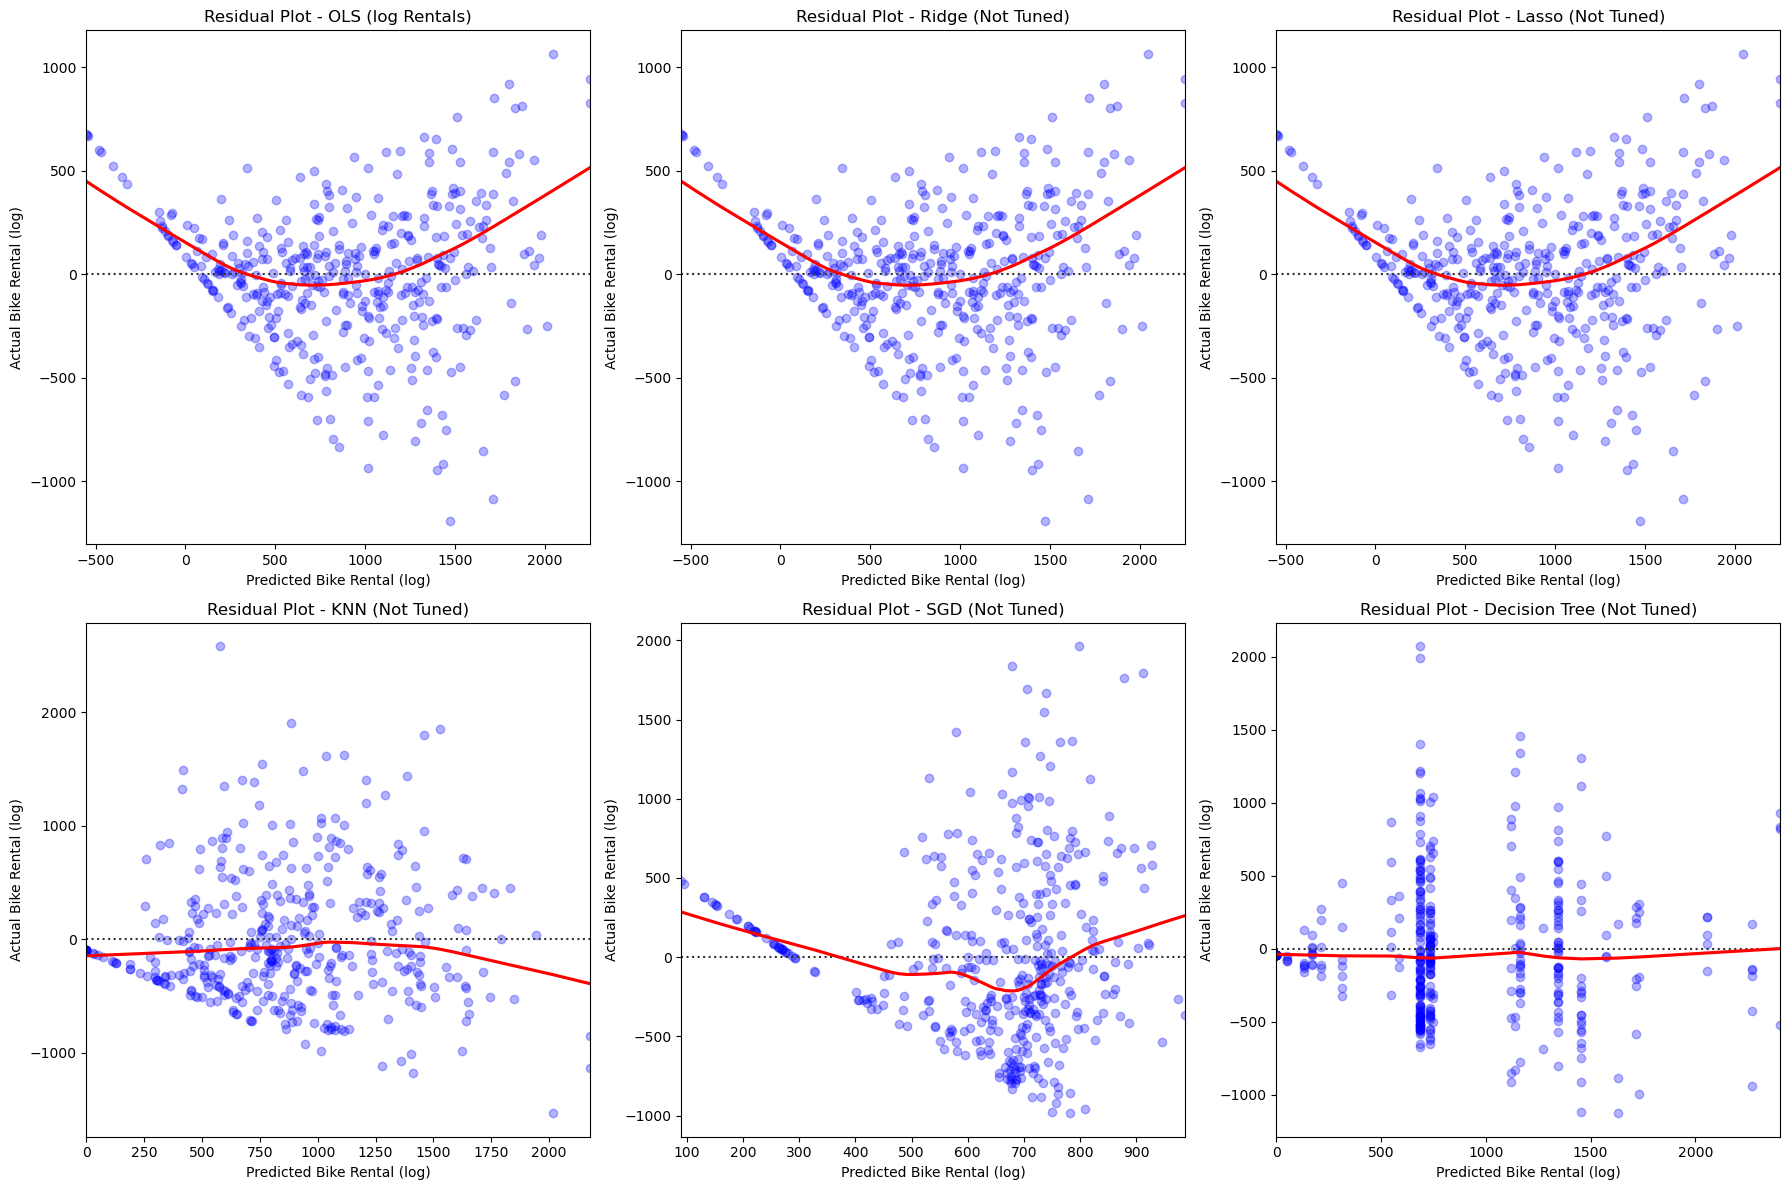

In [54]:
# Plotting Residual Analysis per model

# List of models to loop through
models = [
    ('OLS (log Rentals)', sklearn.linear_model.LinearRegression()),
    ('Ridge (Not Tuned)', sklearn.linear_model.Ridge(alpha=0.01, random_state=702)),
    ('Lasso (Not Tuned)', sklearn.linear_model.Lasso(alpha=0.0001, random_state=702)),
    ('KNN (Not Tuned)', KNeighborsRegressor(algorithm='auto', n_neighbors=6)),
    ('SGD (Not Tuned)', sklearn.linear_model.SGDRegressor(alpha=2, random_state=702, penalty='elasticnet',\
                                                          loss='epsilon_insensitive', learning_rate='adaptive')),
    ('Decision Tree (Not Tuned)', DecisionTreeRegressor(min_samples_leaf = 9, max_depth = 6, random_state = 702))
]

# Create subplots for each model
fig, axs = plt.subplots(2, 3, figsize=(18, 12))

for i, (model_name, model) in enumerate(models):
    # FITTING to the training data
    model_fit = model.fit(x_train, y_train)

    # PREDICTING on new data
    model_pred = model.predict(x_test)

    # organizing residuals
    model_residuals = {"True": y_test, "Predicted": model_pred}

    # converting residuals into df
    model_resid_df = pd.DataFrame(data=model_residuals)

    # developing a residual plot
    ax = axs[i // 3, i % 3]
    sns.residplot(data=model_resid_df, x='Predicted', y='True', lowess=True, color='blue',
                  scatter_kws={'alpha': 0.3}, line_kws={'color': 'red'}, ax=ax)
    
    # title and axis labels
    ax.set_title(f"Residual Plot - {model_name}")
    ax.set_xlabel("Predicted Bike Rental (log)")
    ax.set_ylabel("Actual Bike Rental (log)")

# layout and rendering visual
plt.tight_layout()
plt.show()

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<h3>Top Three Models</h3><br>
1. Lasso Regression <br>
2. Ridge Regression <br>
3. Linear Regression

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<h3>Hyperparameter Tuning</h3><br>

<h3> Lasso Regression Model </h3>

In [55]:
## Hyperparameter Tuning ##

## Lasso
model_name = 'Lasso (Not Tuned)'


# INSTANTIATING model object
model = sklearn.linear_model.Lasso(alpha         = 0.0001,
                                   selection     = 'random',
                                   random_state  = 702)

In [56]:
## ########################### ##
## DON'T CHANGE THE CODE BELOW ##
## ########################### ##

# FITTING to the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING on new data
model_pred = model.predict(x_test)


# SCORING the results
model_train_score = model.score(x_train, y_train).round(4)
model_test_score  = model.score(x_test, y_test).round(4)
model_gap         = abs(model_train_score - model_test_score).round(4)
    

# dynamically printing results
model_summary =  f"""\
Model Name:     {model_name}
Train_Score:    {model_train_score}
Test_Score:     {model_test_score}
Train-Test Gap: {model_gap}
"""

print(model_summary)
# Model Name:     Lasso (Not Tuned)
# Train_Score:    0.7688
# Test_Score:     0.7491
# Train-Test Gap: 0.0197

Model Name:     Lasso (Not Tuned)
Train_Score:    0.7688
Test_Score:     0.7491
Train-Test Gap: 0.0197



In [57]:
## Tuning Lasso Model

# declaring a hyperparameter space
alpha_range = (0.00001, 0.0001, 0.001, 0.01, 1, 1.5, 2, 2.5, 3)
fit_range   = [True, False]
max_range   = np.arange(1000, 11000, 1000)
selection_range = ['cyclic', 'random']

# creating a hyperparameter grid
param_grid = {'alpha'         : alpha_range,
              'fit_intercept' : fit_range,
              'max_iter'      : max_range,
              'selection'     : selection_range}

# INSTANTIATING the model object without hyperparameters
tuned_lasso = sklearn.linear_model.Lasso(random_state = 219)


# RandomizedSearchCV object
tuned_lasso_cv = RandomizedSearchCV(estimator            = tuned_lasso, # model
                                   param_distributions   = param_grid,  # hyperparameter ranges
                                   cv                    = 5,           # folds 
                                   n_iter                = 1000,        # how many models to build
                                   random_state          = 702)


# FITTING to the FULL DATASET (due to cross-validation)
tuned_lasso_cv.fit(x_data, y_data)


# printing the optimal parameters and best score
print("Tuned Parameters  :", tuned_lasso_cv.best_params_)
print("Tuned Training R-squared:", tuned_lasso_cv.best_score_.round(4))
# Tuned Parameters  : {'selection': 'cyclic', 'max_iter': 1000, 'fit_intercept': True, 'alpha': 0.01}
# Tuned Training R-squared: 0.7499

Tuned Parameters  : {'selection': 'cyclic', 'max_iter': 1000, 'fit_intercept': True, 'alpha': 0.01}
Tuned Training R-squared: 0.7499


In [58]:
# Tuning Results
# Tuned Parameters  : {'selection': 'cyclic', 'max_iter': 1000, 'fit_intercept': True, 'alpha': 0.01}
# Tuned Training R-squared: 0.7499

# New Prediction using tuning parameters result

## Lasso
model_name = 'Lasso (Tuned)'


# INSTANTIATING model object
model = sklearn.linear_model.Lasso(alpha         = 0.01,
                                   selection     = 'cyclic',
                                   max_iter      = 1000,
                                   fit_intercept = True,
                                   random_state  = 702)

# FITTING to the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING on new data
model_pred = model.predict(x_test)


# SCORING the results
model_train_score = model.score(x_train, y_train).round(4)
model_test_score  = model.score(x_test, y_test).round(4)
model_gap         = abs(model_train_score - model_test_score).round(4)
    

# dynamically printing results
model_summary =  f"""\
Model Name:     {model_name}
Train_Score:    {model_train_score}
Test_Score:     {model_test_score}
Train-Test Gap: {model_gap}
"""

print(model_summary)
# Model Name:     Lasso (Tuned)
# Train_Score:    0.7688
# Test_Score:     0.749
# Train-Test Gap: 0.0198

Model Name:     Lasso (Tuned)
Train_Score:    0.7688
Test_Score:     0.749
Train-Test Gap: 0.0198



<h3> Ridge Regression Model </h3>

In [70]:
## Hyperparameter Tuning ##

## Ridge
model_name = 'Ridge (Not Tuned)'

# INSTANTIATING a model object
model = sklearn.linear_model.Ridge(alpha         = 0.01,
                                   random_state  = 702)

# FITTING to the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING on new data
model_pred = model.predict(x_test)


# SCORING the results
model_train_score = model.score(x_train, y_train).round(4)
model_test_score  = model.score(x_test, y_test).round(4)
model_gap         = abs(model_train_score - model_test_score).round(4)
    

# dynamically printing results
model_summary =  f"""\
Model Name:     {model_name}
Train_Score:    {model_train_score}
Test_Score:     {model_test_score}
Train-Test Gap: {model_gap}
"""

print(model_summary)

Model Name:     Ridge (Not Tuned)
Train_Score:    0.7688
Test_Score:     0.7491
Train-Test Gap: 0.0197



In [71]:
# Tuning Ridge Model

# declaring a hyperparameter space
alpha_range = (0.00001, 0.0001, 0.001, 0.01, 1, 1.5, 2, 2.5, 3)
fit_range   = [True, False]
max_range   = np.arange(1000, 11000, 1000)
solver_range = ["auto", "svd", "cholesky", "lsqr", "sparse_cg", "sag", "saga", "lbfgs"]
positive_range = [True, False]



# creating a hyperparameter grid
param_grid = {'alpha'         : alpha_range,
              'fit_intercept' : fit_range,
              'max_iter'      : max_range,
              'solver'        : solver_range,
              'positive'      : positive_range}



# INSTANTIATING the model object without hyperparameters
tuned_ridge = sklearn.linear_model.Ridge(random_state = 219)


# RandomizedSearchCV object
tuned_ridge_cv = RandomizedSearchCV(estimator            = tuned_ridge, # model
                                   param_distributions   = param_grid,  # hyperparameter ranges
                                   cv                    = 5,           # folds 
                                   n_iter                = 500,        # how many models to build
                                   random_state          = 702)


# FITTING to the FULL DATASET (due to cross-validation)
tuned_ridge_cv.fit(x_data, y_data)


# printing the optimal parameters and best score
print("Tuned Parameters  :", tuned_ridge_cv.best_params_)
print("Tuned Training R-squared:", tuned_ridge_cv.best_score_.round(4))

KeyboardInterrupt: 

In [ ]:
# Tuning Results


# New Prediction using tuning parameters result

## Ridge
model_name = 'Ridge (Tuned)'


# INSTANTIATING a model object - CHANGE THIS AS NEEDED
model = sklearn.linear_model.Ridge(alpha         = 3,
                                   solver        = 'sparse_cg',
                                   positive      = False,
                                   max_iter      = 6000,
                                   fit_intercept = True,
                                   random_state  = 702)

# FITTING to the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING on new data
model_pred = model.predict(x_test)


# SCORING the results
model_train_score = model.score(x_train, y_train).round(4)
model_test_score  = model.score(x_test, y_test).round(4)
model_gap         = abs(model_train_score - model_test_score).round(4)
    

# dynamically printing results
model_summary =  f"""\
Model Name:     {model_name}
Train_Score:    {model_train_score}
Test_Score:     {model_test_score}
Train-Test Gap: {model_gap}
"""

print(model_summary)

<h3> Decision Tree </h3>

In [59]:
## Hyperparameter Tuning ##

## Decision Tree
model_name = 'Unpruned Regression Tree (Not Tuned)'

# INSTANTIATING a model object
model = DecisionTreeRegressor(min_samples_leaf = 9,
                              max_depth        = 6,
                              random_state     = 702)

# FITTING to the training data
model_fit = model.fit(x_train, y_train)

# PREDICTING on new data
model_pred = model.predict(x_test)

# SCORING the results
model_train_score = model.score(x_train, y_train).round(4)
model_test_score  = model.score(x_test, y_test).round(4)
model_gap         = abs(model_train_score - model_test_score).round(4)
    
# dynamically printing results
model_summary =  f"""\
Model Name:     {model_name}
Train_Score:    {model_train_score}
Test_Score:     {model_test_score}
Train-Test Gap: {model_gap}
"""

print(model_summary)
# Model Name:     Unpruned Regression Tree (Not Tuned)
# Train_Score:    0.6496
# Test_Score:     0.5361
# Train-Test Gap: 0.1135

Model Name:     Unpruned Regression Tree (Not Tuned)
Train_Score:    0.6496
Test_Score:     0.5361
Train-Test Gap: 0.1135



In [60]:
# Tuning Decision Tree Regression Model

# declaring a hyperparameter space
#criterion_range = ["squared_error", "friedman_mse", "absolute_error", "poisson"]
#splitter_range  = ["best", "random"]
#depth_range     = np.arange(1,11, 1)
#leaf_range      = np.arange(1,251, 5)


# creating a hyperparameter grid
#param_grid = {'criterion'        : criterion_range,
#             'splitter'          : splitter_range,
#             'max_depth'         : depth_range,
#             'min_samples_leaf'  : leaf_range}

# INSTANTIATING the model object without hyperparameters
#tuned_tree = DecisionTreeRegressor(random_state = 219)


# RandomizedSearchCV object
#tuned_tree_cv = RandomizedSearchCV(estimator             = tuned_tree, # model
#                                   param_distributions   = param_grid, # hyperparameter ranges
#                                   cv                    = 5,          # folds 
#                                   n_iter                = 1000,       # how many models to build
#                                  random_state          = 702)


# FITTING to the FULL DATASET (due to cross-validation)
#tuned_tree_cv.fit(x_data, y_data)


# printing the optimal parameters and best score
#print("Tuned Parameters  :", tuned_tree_cv.best_params_)
#print("Tuned Training R-squared:", tuned_tree_cv.best_score_.round(4))

Tuned Parameters  : {'splitter': 'best', 'min_samples_leaf': 11, 'max_depth': 10, 'criterion': 'poisson'}
Tuned Training R-squared: 0.6783


In [62]:
# Tuning Results
# Tuned Parameters  : {'splitter': 'best', 'min_samples_leaf': 11, 'max_depth': 10, 'criterion': 'poisson'}
# Tuned Training R-squared: 0.6783

# New Prediction using tuning parameters result

## Linear Regression
model_name = 'Pruned Regression Tree (Tuned)'

# INSTANTIATING a model object 
model = DecisionTreeRegressor(min_samples_leaf = 11,
                              max_depth        = 10,
                              random_state     = 702,
                              splitter         = 'best',
                              criterion        = 'poisson')
                                
# FITTING to the training data
model_fit = model.fit(x_train, y_train)

# PREDICTING on new data
model_pred = model.predict(x_test)

# SCORING the results
model_train_score = model.score(x_train, y_train).round(4)
model_test_score  = model.score(x_test, y_test).round(4)
model_gap         = abs(model_train_score - model_test_score).round(4)
    
# dynamically printing results
model_summary =  f"""\
Model Name:     {model_name}
Train_Score:    {model_train_score}
Test_Score:     {model_test_score}
Train-Test Gap: {model_gap}
"""

print(model_summary)

Model Name:     Pruned Regression Tree (Tuned)
Train_Score:    0.7393
Test_Score:     0.6534
Train-Test Gap: 0.0859



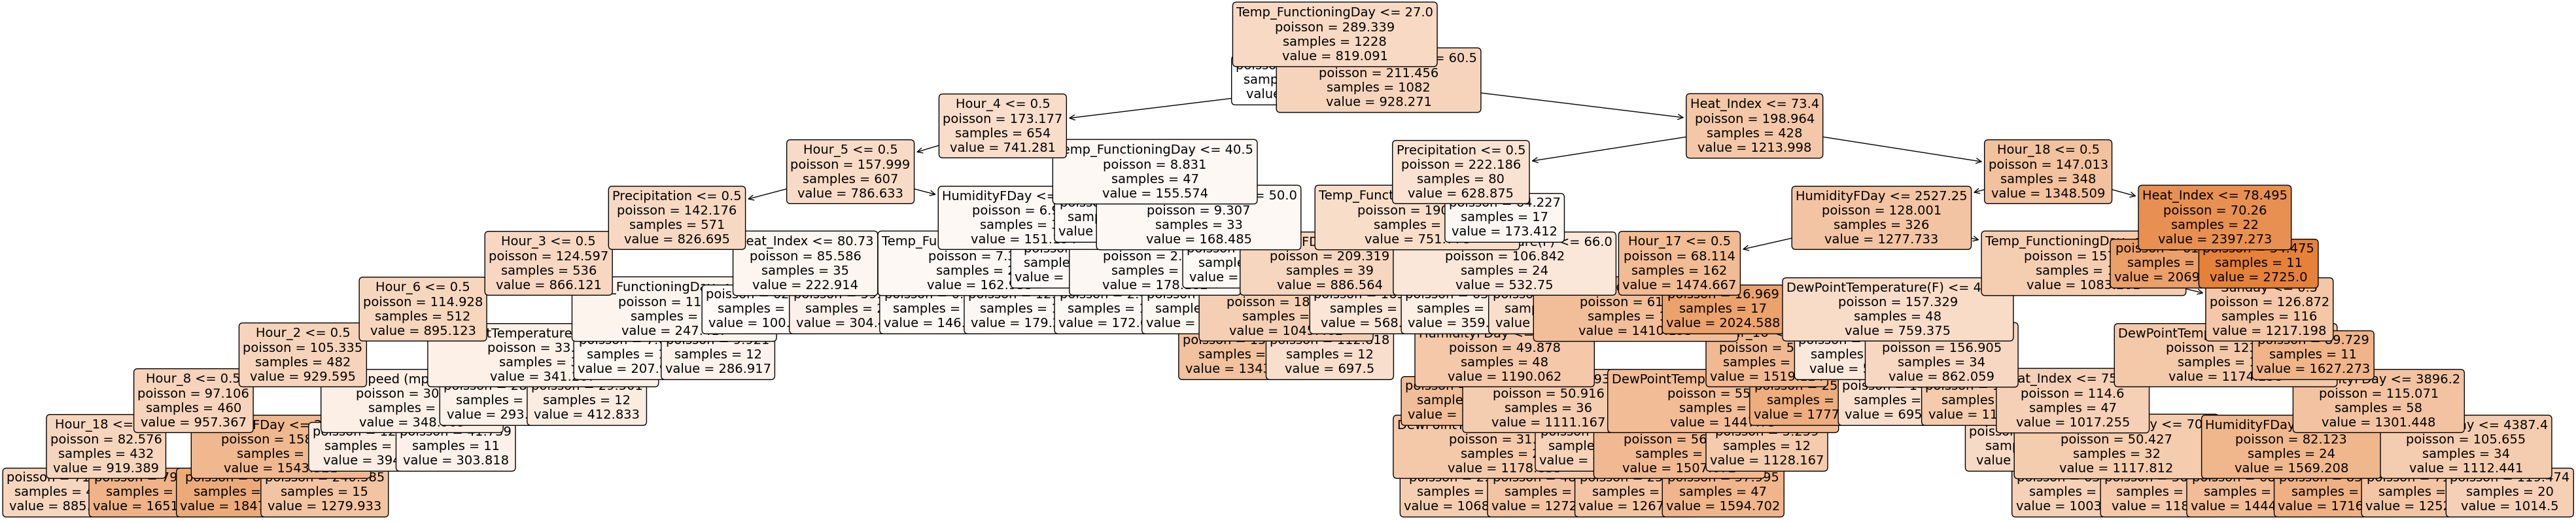

In [63]:
# setting figure size

plt.figure(figsize=(50, 10)) # adjusting to better fit the visual


# developing a plotted tree
plot_tree(decision_tree = model, # changing to pruned_tree_fit
          feature_names = list(x_train.columns),
          filled        = True, 
          rounded       = True, 
          fontsize      = 14)


# rendering the plot
plt.show()

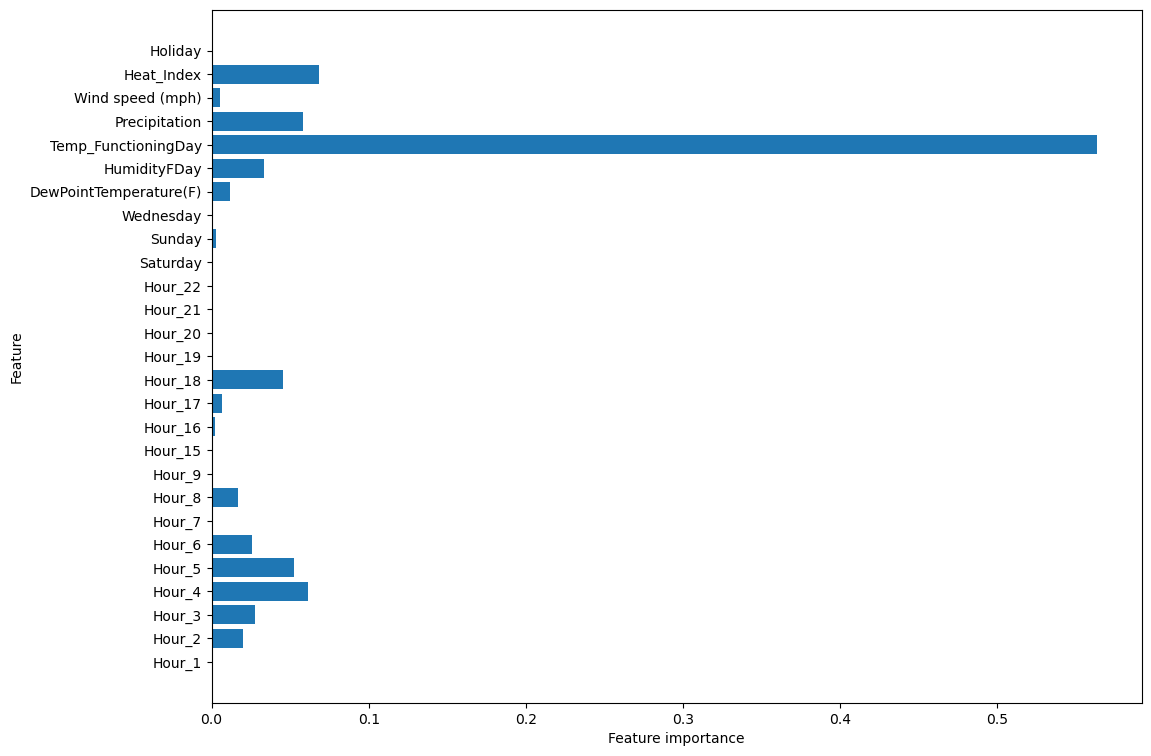

In [64]:
########################################
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = x_train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('Tree_Leaf_50_Feature_Importance.png')

# plotting feature importance
plot_feature_importances(model,
                         train = x_train,
                         export = False)

In [65]:
## OLS

# naming the model
model_name = 'Linear Regression'

# model type
model = sklearn.linear_model.LinearRegression()

In [66]:
# FITTING to the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING on new data
model_pred = model.predict(x_test)


# SCORING the results
model_train_score = model.score(x_train, y_train).round(4)
model_test_score  = model.score(x_test, y_test).round(4)
model_gap         = abs(model_train_score - model_test_score).round(4)
    

# dynamically printing results
model_summary =  f"""\
Model Name:     {model_name}
Train_Score:    {model_train_score}
Test_Score:     {model_test_score}
Train-Test Gap: {model_gap}
"""

print(model_summary)

Model Name:     Linear Regression
Train_Score:    0.7688
Test_Score:     0.7491
Train-Test Gap: 0.0197



<h3> Top Three Models (after tuning) </h3>

In [ ]:
## Top Three Models (after Tuning) ##

# List of models to loop through (OLS, Ridge, Lasso, SGD)
models = [
    ('Linear Regression (Tuned)', sklearn.linear_model.LinearRegression()),
    ('Ridge (Tuned)', sklearn.linear_model.Ridge(alpha = 0.01, random_state = 702)),
    ('Lasso (Tuned)', sklearn.linear_model.Lasso(alpha = 0.001, random_state = 702, selection = 'cyclic',
                                                     max_iter = 1000, fit_intercept = False)),
]


# Placeholder DataFrame to store coefficients
coef_df = pd.DataFrame(columns=['Model Name', 'new_train_RSQ', 'new_test_RSQ', 'new_tt_gap', 'Intercept'] + list(x_data.columns))

for model_name, model in models:
    # FITTING to the training data
    model_fit = model.fit(x_train, y_train)

    # PREDICTING on new data
    model_pred = model.predict(x_test)

    # SCORING the results
    model_train_score = model.score(x_train, y_train).round(4)
    model_test_score = model.score(x_test, y_test).round(4)
    model_gap = abs(model_train_score - model_test_score).round(4)

    # Setting up a placeholder list to store model features
    coefficient_lst = [('intercept', model.intercept_.round(decimals=4))]

    # Printing out each feature-coefficient pair one by one
    for coefficient in model.coef_.round(decimals=4):
        coefficient_lst.append(coefficient)

    # Instantiating a list to store model results
    coef_lst = [model_name, model_train_score, model_test_score, model_gap, model.intercept_.round(decimals=6)]

    # Extending list with feature coefficients
    coef_lst.extend(model.coef_.round(decimals=6))

    # Converting to DataFrame
    coef_lst = pd.DataFrame(data=coef_lst)

    # Transposing (rotating) DataFrame
    coef_lst = np.transpose(coef_lst)

    # Adding column names
    coef_columns = ['Model Name', 'new_train_RSQ', 'new_test_RSQ', 'new_tt_gap', 'Intercept']
    coef_columns.extend(x_data.columns)
    coef_lst.columns = coef_columns

    # Concatenating to coef_df
    coef_df = pd.concat(objs=[coef_df, coef_lst], axis=0, ignore_index=True)

# Displaying the results
coef_df

In [ ]:
# x-data
x_data_kaggle = kaggle_data[x_features].copy()


# y-data
y_data_kaggle = kaggle_data[y_variable]


# Fitting model from above to the Kaggle test data
kaggle_predictions = model.predict(x_data_kaggle)

# Transforming back to Rentals
kaggle_predictions = np.exp(kaggle_predictions)-1

<br>
<h3>Creating the Kaggle File</h3><br>

In [ ]:
## Kaggle Submission File ##

# organizing predictions
model_predictions = {"RENTALS" : kaggle_predictions}


# converting predictions into df
model_pred_df = pd.DataFrame(data  = model_predictions,
                             index = df_test.index)

In [ ]:
#!######################!#
#!# name the .csv file #!#
#!######################!#

# name your model
model_pred_df.to_csv(path_or_buf = "./model_output/WHOLERUN.csv",
                     index       = True,
                     index_label = 'ID')

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

~~~

  _    _                           __  __           _      _ _             _ 
 | |  | |                         |  \/  |         | |    | (_)           | |
 | |__| | __ _ _ __  _ __  _   _  | \  / | ___   __| | ___| |_ _ __   __ _| |
 |  __  |/ _` | '_ \| '_ \| | | | | |\/| |/ _ \ / _` |/ _ \ | | '_ \ / _` | |
 | |  | | (_| | |_) | |_) | |_| | | |  | | (_) | (_| |  __/ | | | | | (_| |_|
 |_|  |_|\__,_| .__/| .__/ \__, | |_|  |_|\___/ \__,_|\___|_|_|_| |_|\__, (_)
              | |   | |     __/ |                                     __/ |  
              |_|   |_|    |___/                                     |___/   

                                                            

~~~

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />